# Final Project - Basic Analysis and Dashboard

## Part 1: Install PySpark

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
!apt-get install -y openjdk-8-jdk-headless
!wget -q https://dlcdn.apache.org/spark/spark-3.3.2/spark-3.3.2-bin-hadoop3.tgz
!tar xf spark-3.3.2-bin-hadoop3.tgz
!pip install -q findspark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.3.2-bin-hadoop3"
import findspark
findspark.init()
findspark.find()
from pyspark.sql import SparkSession
spark = SparkSession.builder\
        .master("local[2]")\
        .appName("Colab")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()

spark

Mounted at /content/drive
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  openjdk-8-jre-headless
Suggested packages:
  openjdk-8-demo openjdk-8-source libnss-mdns fonts-dejavu-extra
  fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei
  fonts-wqy-zenhei fonts-indic
The following NEW packages will be installed:
  openjdk-8-jdk-headless openjdk-8-jre-headless
0 upgraded, 2 newly installed, 0 to remove and 23 not upgraded.
Need to get 36.5 MB of archives.
After this operation, 144 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 openjdk-8-jre-headless amd64 8u362-ga-0ubuntu1~20.04.1 [28.2 MB]
Get:2 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 openjdk-8-jdk-headless amd64 8u362-ga-0ubuntu1~20.04.1 [8,282 kB]
Fetched 36.5 MB in 2s (17.1 MB/s)
Selecting previously unselected package openjdk-8-jre-headles

## Part 2: Import and Explore datasets

### Import datasets

In [2]:
# Import datasets
df_cab = spark.read.csv('/content/drive/My Drive/cab_rides.csv', inferSchema=True, header=True)
df_weather = spark.read.csv('/content/drive/My Drive/weather.csv', inferSchema=True, header=True)

### Explore df_cab dataset

In [3]:
df_cab.printSchema()

root
 |-- distance: double (nullable = true)
 |-- cab_type: string (nullable = true)
 |-- time_stamp: long (nullable = true)
 |-- destination: string (nullable = true)
 |-- source: string (nullable = true)
 |-- price: double (nullable = true)
 |-- surge_multiplier: double (nullable = true)
 |-- id: string (nullable = true)
 |-- product_id: string (nullable = true)
 |-- name: string (nullable = true)



In [4]:
df_cab.show(10)

+--------+--------+-------------+--------------------+----------------+-----+----------------+--------------------+------------+------------+
|distance|cab_type|   time_stamp|         destination|          source|price|surge_multiplier|                  id|  product_id|        name|
+--------+--------+-------------+--------------------+----------------+-----+----------------+--------------------+------------+------------+
|    0.44|    Lyft|1544952607890|       North Station|Haymarket Square|  5.0|             1.0|424553bb-7174-41e...|   lyft_line|      Shared|
|    0.44|    Lyft|1543284023677|       North Station|Haymarket Square| 11.0|             1.0|4bd23055-6827-41c...|lyft_premier|         Lux|
|    0.44|    Lyft|1543366822198|       North Station|Haymarket Square|  7.0|             1.0|981a3613-77af-462...|        lyft|        Lyft|
|    0.44|    Lyft|1543553582749|       North Station|Haymarket Square| 26.0|             1.0|c2d88af2-d278-4bf...| lyft_luxsuv|Lux Black XL|
|    0

In [5]:
df_cab.count()

693071

In [6]:
df_cab.describe().show()

+-------+------------------+--------+--------------------+-----------+--------+-----------------+-------------------+--------------------+--------------------+------+
|summary|          distance|cab_type|          time_stamp|destination|  source|            price|   surge_multiplier|                  id|          product_id|  name|
+-------+------------------+--------+--------------------+-----------+--------+-----------------+-------------------+--------------------+--------------------+------+
|  count|            693071|  693071|              693071|     693071|  693071|           637976|             693071|              693071|              693071|693071|
|   mean| 2.189429755392529|    null|1.544045709764345...|       null|    null|16.54512549061407| 1.0138697911180816|                null|                null|  null|
| stddev|1.1389369868597283|    null| 6.891924924002267E8|       null|    null| 9.32435858141163|0.09164126209924173|                null|                null|  null

### Explore df_weather dataset

In [7]:
df_weather.printSchema()

root
 |-- temp: double (nullable = true)
 |-- location: string (nullable = true)
 |-- clouds: double (nullable = true)
 |-- pressure: double (nullable = true)
 |-- rain: double (nullable = true)
 |-- time_stamp: integer (nullable = true)
 |-- humidity: double (nullable = true)
 |-- wind: double (nullable = true)



In [8]:
df_weather.show(5)

+-----+------------------+------+--------+------+----------+--------+-----+
| temp|          location|clouds|pressure|  rain|time_stamp|humidity| wind|
+-----+------------------+------+--------+------+----------+--------+-----+
|42.42|          Back Bay|   1.0| 1012.14|0.1228|1545003901|    0.77|11.25|
|42.43|       Beacon Hill|   1.0| 1012.15|0.1846|1545003901|    0.76|11.32|
| 42.5| Boston University|   1.0| 1012.15|0.1089|1545003901|    0.76|11.07|
|42.11|            Fenway|   1.0| 1012.13|0.0969|1545003901|    0.77|11.09|
|43.13|Financial District|   1.0| 1012.14|0.1786|1545003901|    0.75|11.49|
+-----+------------------+------+--------+------+----------+--------+-----+
only showing top 5 rows



In [9]:
df_weather.count()

6276

In [10]:
df_weather.describe().show()

+-------+-----------------+--------+-------------------+------------------+-------------------+--------------------+-------------------+-----------------+
|summary|             temp|location|             clouds|          pressure|               rain|          time_stamp|           humidity|             wind|
+-------+-----------------+--------+-------------------+------------------+-------------------+--------------------+-------------------+-----------------+
|  count|             6276|    6276|               6276|              6276|                894|                6276|               6276|             6276|
|   mean|39.09047482472911|    null| 0.6777772466539169|1008.4452087316826|0.05765234899328866|1.5438573771464307E9| 0.7639850223071987|6.802812300828564|
| stddev|  6.0220551532288|    null|0.31428408307617384|12.870774589670049|0.10075780186235396|   665933.9834574185|0.12733970290131633|3.633466319108259|
|    min|            19.62|Back Bay|                0.0|            98

## Part 3: Clean the datasets

### Clean the df_cab dataset

#### Check and Replace missing values

In [11]:
# Check missing values
from pyspark.sql.functions import col, sum

# count the number of missing values for each column
missing_values = df_cab.agg(*[sum(col(c).isNull().cast("int")).alias(c) for c in df_cab.columns])

# show the result
missing_values.show()

+--------+--------+----------+-----------+------+-----+----------------+---+----------+----+
|distance|cab_type|time_stamp|destination|source|price|surge_multiplier| id|product_id|name|
+--------+--------+----------+-----------+------+-----+----------------+---+----------+----+
|       0|       0|         0|          0|     0|55095|               0|  0|         0|   0|
+--------+--------+----------+-----------+------+-----+----------------+---+----------+----+



<ipython-input-12-38baceadd842>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pandas_df['price'], kde=False, rug=True)


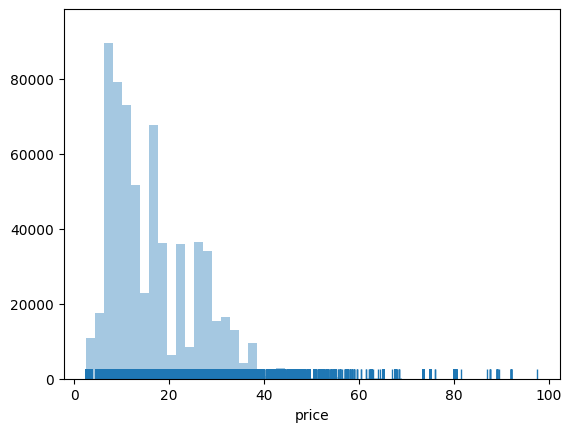

In [12]:
# Distribution of 'price' variable

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql.functions import col

# convert to pandas dataframe
pandas_df = df_cab.select(col("price")).toPandas()

# create distribution plot using seaborn
sns.distplot(pandas_df['price'], kde=False, rug=True)

# display the plot
plt.show()

In [13]:
# Replace missing values in 'price' variable with median value

from pyspark.sql.functions import col, when

# calculate the median value of the column
# calculate approximate median value
median_value = df_cab.approxQuantile("price", [0.5], 0)[0]

# replace missing values with median value
df_cab = df_cab.withColumn("price", when(col("price").isNull(), median_value).otherwise(col("price")))

In [14]:
missing_values = df_cab.agg(*[sum(col(c).isNull().cast("int")).alias(c) for c in df_cab.columns])
missing_values.show()

+--------+--------+----------+-----------+------+-----+----------------+---+----------+----+
|distance|cab_type|time_stamp|destination|source|price|surge_multiplier| id|product_id|name|
+--------+--------+----------+-----------+------+-----+----------------+---+----------+----+
|       0|       0|         0|          0|     0|    0|               0|  0|         0|   0|
+--------+--------+----------+-----------+------+-----+----------------+---+----------+----+



Successfully clean the missing values.

#### Remove duplicated values

In [15]:
# Drop duplicated values
df_cab = df_cab.dropDuplicates()

In [16]:
# After checking the number of records, we found that there are no duplicated records
df_cab.count()

693071

#### Check the outliers

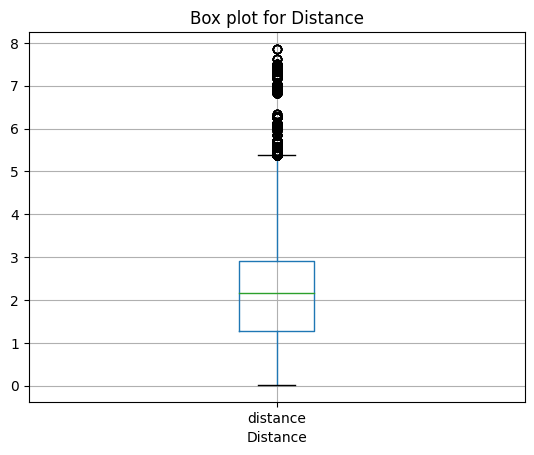

In [17]:
# Check distribution of 'distance' variable
import matplotlib.pyplot as plt

# convert Spark dataframe to Pandas dataframe
pandas_df = df_cab.select("distance").toPandas()

# create box plot using Pandas
pandas_df.boxplot(column="distance")

# set plot title and axis labels
plt.title("Box plot for Distance")
plt.xlabel("Distance")

# show plot
plt.show()

In [18]:
from pyspark.sql.functions import col, when

# calculate quartiles for column
quartiles = df_cab.approxQuantile("distance", [0.25, 0.75], 0.05)

# calculate lower and upper bounds for outliers
IQR = quartiles[1] - quartiles[0]
lower_bound = quartiles[0] - 1.5 * IQR
upper_bound = quartiles[1] + 1.5 * IQR

# calculate mean and standard deviation of distance column
distance_mean = df_cab.agg({"distance": "mean"}).collect()[0][0]
distance_stddev = df_cab.agg({"distance": "stddev"}).collect()[0][0]

# count the number of outliers in the distance column
outliers_count = df_cab.filter(df_cab['distance'] > distance_mean + 3*distance_stddev).count()

print("Number of outliers in distance: ", outliers_count)

Number of outliers in distance:  4911


In [19]:
df_cab = df_cab.filter((col("distance") >= lower_bound) & (col("distance") <= upper_bound))

In [20]:
df_cab.count()

682199

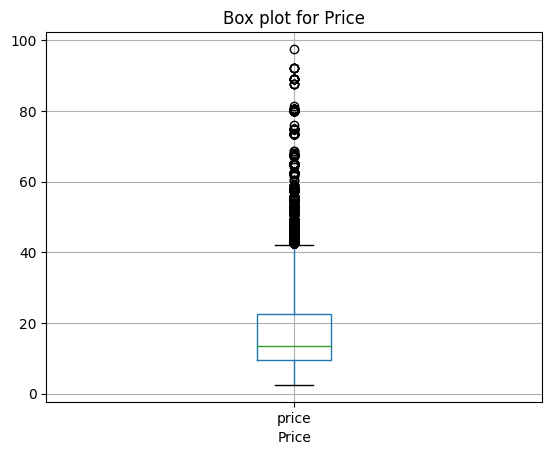

In [21]:
# Check distribution of 'price' variable
import matplotlib.pyplot as plt

# convert Spark dataframe to Pandas dataframe
pandas_df = df_cab.select("price").toPandas()

# create box plot using Pandas
pandas_df.boxplot(column="price")

# set plot title and axis labels
plt.title("Box plot for Price")
plt.xlabel("Price")

# show plot
plt.show()

In [22]:
from pyspark.sql.functions import col, when

# calculate quartiles for column
quartiles = df_cab.approxQuantile("price", [0.25, 0.75], 0.05)

# calculate lower and upper bounds for outliers
IQR = quartiles[1] - quartiles[0]
lower_bound = quartiles[0] - 1.5 * IQR
upper_bound = quartiles[1] + 1.5 * IQR

# count outliers
outliers_count = df_cab.select("price") \
    .where((col("price") < lower_bound) | (col("price") > upper_bound)) \
    .count()

print("Number of outliers in price: ", outliers_count)

Number of outliers in price:  6401


In [23]:
cab = df_cab.filter((col("price") >= lower_bound) & (col("price") <= upper_bound))

#### Remove useless 'id' column

In [24]:
cab = cab.drop("id")

In [25]:
cab.count()

675798

### Convert the timestamp data into real date format in cab dataset.

In [26]:
from pyspark.sql.functions import from_unixtime, date_format

cab = cab.withColumn('time_stamp', (cab['time_stamp'] / 1000).cast('timestamp'))
cab = cab.withColumn('date_hour', date_format(cab['time_stamp'], 'yyyy-MM-dd HH'))

In [27]:
cab = cab.drop("time_stamp")

In [28]:
cab.show(10)

+--------+--------+--------------------+--------------------+-----+----------------+--------------------+------------+-------------+
|distance|cab_type|         destination|              source|price|surge_multiplier|          product_id|        name|    date_hour|
+--------+--------+--------------------+--------------------+-----+----------------+--------------------+------------+-------------+
|    1.17|    Lyft|    Haymarket Square|  Financial District|  7.0|             1.0|                lyft|        Lyft|2018-11-30 13|
|    1.03|    Uber|       North Station|           North End|  6.5|             1.0|997acbb5-e102-41e...|    UberPool|2018-11-29 00|
|    1.57|    Uber|           North End|    Theatre District|  9.5|             1.0|55c66225-fbe7-4fd...|       UberX|2018-12-17 06|
|     3.3|    Uber|Northeastern Univ...|  Financial District| 10.5|             1.0|9a0e7b09-b92b-4c4...|         WAV|2018-12-15 03|
|    2.35|    Lyft|   Boston University|         Beacon Hill|  9.0|  

### Clean the df_weather dataset

#### Check and Replace missing values

In [29]:
# Check missing values
# count the number of missing values for each column
missing_values = df_weather.agg(*[sum(col(c).isNull().cast("int")).alias(c) for c in df_weather.columns])

# show the result
missing_values.show()

+----+--------+------+--------+----+----------+--------+----+
|temp|location|clouds|pressure|rain|time_stamp|humidity|wind|
+----+--------+------+--------+----+----------+--------+----+
|   0|       0|     0|       0|5382|         0|       0|   0|
+----+--------+------+--------+----+----------+--------+----+



<ipython-input-30-6a284a6914b6>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pandas_df['rain'], kde=False, rug=True)


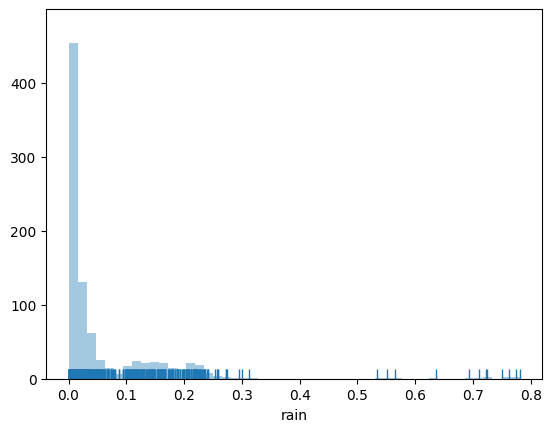

In [30]:
# Distribution of 'rain' variable
# convert to pandas dataframe
pandas_df = df_weather.select(col("rain")).toPandas()

# create distribution plot using seaborn
sns.distplot(pandas_df['rain'], kde=False, rug=True)

# display the plot
plt.show()

In [31]:
# Replace missing values in 'rain' variable with median value
# calculate the median value of the column
# calculate approximate median value
median_value = df_weather.approxQuantile("rain", [0.5], 0)[0]

# replace missing values with median value
df_weather = df_weather.withColumn("rain", when(col("rain").isNull(), median_value).otherwise(col("rain")))

In [32]:
# check afte filling the missing value

missing_values = df_weather.agg(*[sum(col(c).isNull().cast("int")).alias(c) for c in df_weather.columns])

# show the result
missing_values.show()

+----+--------+------+--------+----+----------+--------+----+
|temp|location|clouds|pressure|rain|time_stamp|humidity|wind|
+----+--------+------+--------+----+----------+--------+----+
|   0|       0|     0|       0|   0|         0|       0|   0|
+----+--------+------+--------+----+----------+--------+----+



#### Remove duplicated values

In [33]:
# Drop duplicated values
df_weather = df_weather.dropDuplicates()

In [34]:
# After checking the number of records, we found that there are no duplicated records
df_weather.count()

6276

#### Check the outliers

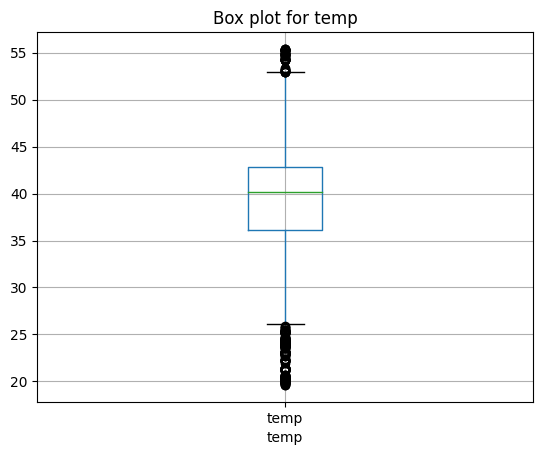

In [35]:
# Check distribution of 'temp' variable
# convert Spark dataframe to Pandas dataframe
pandas_df = df_weather.select("temp").toPandas()

# create box plot using Pandas
pandas_df.boxplot(column="temp")

# set plot title and axis labels
plt.title("Box plot for temp")
plt.xlabel("temp")

# show plot
plt.show()

In [36]:
from pyspark.sql.functions import col, when

# calculate quartiles for column
quartiles = df_weather.approxQuantile("temp", [0.25, 0.75], 0.05)

# calculate lower and upper bounds for outliers
IQR = quartiles[1] - quartiles[0]
lower_bound = quartiles[0] - 1.5 * IQR
upper_bound = quartiles[1] + 1.5 * IQR

# count outliers
outliers_count = df_weather.select("temp") \
    .where((col("temp") < lower_bound) | (col("temp") > upper_bound)) \
    .count()

print("Number of outliers in temp: ", outliers_count)

Number of outliers in temp:  433


In [37]:
# Replace the outliers with the nearest non-outlier value
from pyspark.sql.functions import col, when, lag, lead
from pyspark.sql.window import Window

df_weather = df_weather.withColumn(
    "temp_replaced",
    when(col("temp") < lower_bound, lag(col("temp")).over(Window.orderBy(col("temp")))).otherwise(
        when(col("temp") > upper_bound, lead(col("temp")).over(Window.orderBy(col("temp")))).otherwise(col("temp"))
    )
)

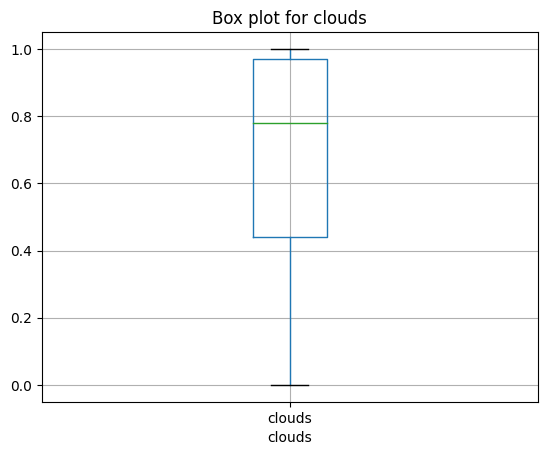

In [38]:
# Check distribution of 'clouds' variable
# convert Spark dataframe to Pandas dataframe
pandas_df = df_weather.select("clouds").toPandas()

# create box plot using Pandas
pandas_df.boxplot(column="clouds")

# set plot title and axis labels
plt.title("Box plot for clouds")
plt.xlabel("clouds")

# show plot
plt.show()

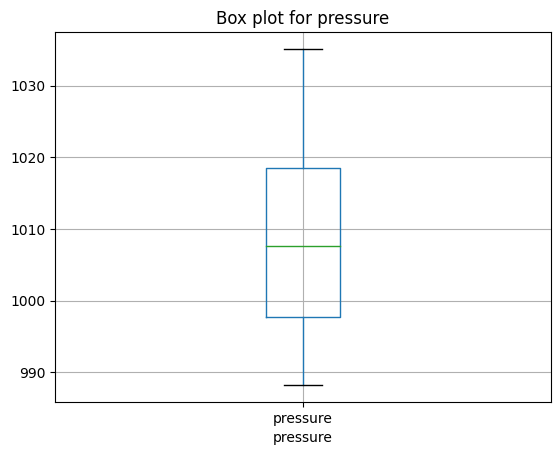

In [39]:
# Check distribution of 'pressure' variable
# convert Spark dataframe to Pandas dataframe
pandas_df = df_weather.select("pressure").toPandas()

# create box plot using Pandas
pandas_df.boxplot(column="pressure")

# set plot title and axis labels
plt.title("Box plot for pressure")
plt.xlabel("pressure")

# show plot
plt.show()

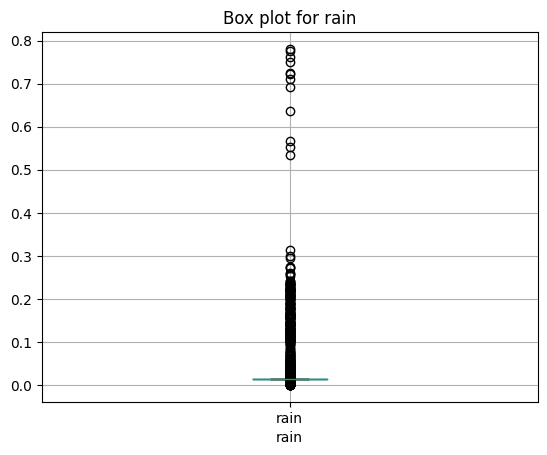

In [40]:
# Check distribution of 'rain' variable
# convert Spark dataframe to Pandas dataframe
pandas_df = df_weather.select("rain").toPandas()

# create box plot using Pandas
pandas_df.boxplot(column="rain")

# set plot title and axis labels
plt.title("Box plot for rain")
plt.xlabel("rain")

# show plot
plt.show()

In [41]:
from pyspark.sql.functions import col, when

# calculate quartiles for column
quartiles = df_weather.approxQuantile("rain", [0.25, 0.75], 0.05)

# calculate lower and upper bounds for outliers
IQR = quartiles[1] - quartiles[0]
lower_bound = quartiles[0] - 1.5 * IQR
upper_bound = quartiles[1] + 1.5 * IQR

# count outliers
outliers_count = df_weather.select("rain") \
    .where((col("rain") < lower_bound) | (col("rain") > upper_bound)) \
    .count()

print("Number of outliers in rain: ", outliers_count)

Number of outliers in rain:  893


In [42]:
# Replace the outliers with the nearest non-outlier value
df_weather = df_weather.withColumn(
    "rain_replaced",
    when(col("rain") < lower_bound, lag(col("rain")).over(Window.orderBy(col("rain")))).otherwise(
        when(col("rain") > upper_bound, lead(col("rain")).over(Window.orderBy(col("rain")))).otherwise(col("rain"))
    )
)

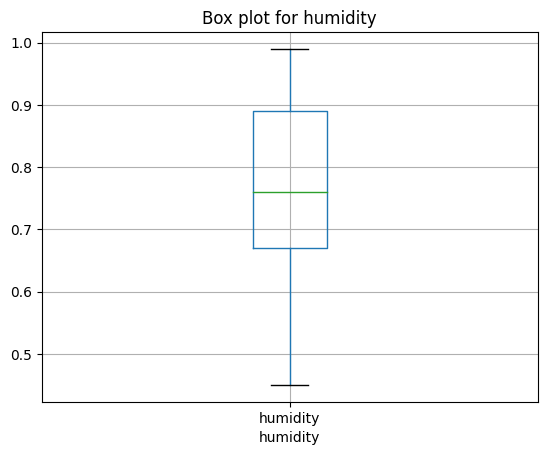

In [43]:
# Check distribution of 'humidity' variable
# convert Spark dataframe to Pandas dataframe
pandas_df = df_weather.select("humidity").toPandas()

# create box plot using Pandas
pandas_df.boxplot(column="humidity")

# set plot title and axis labels
plt.title("Box plot for humidity")
plt.xlabel("humidity")

# show plot
plt.show()

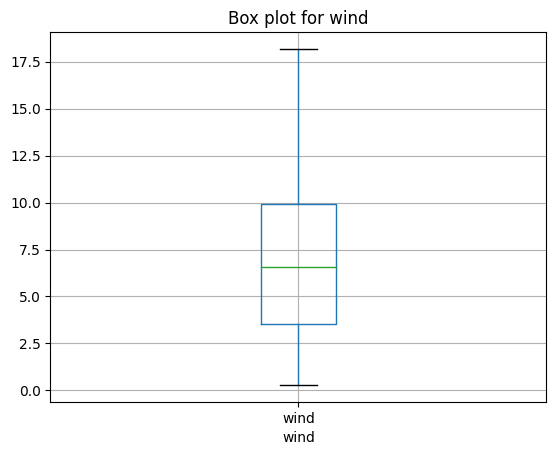

In [44]:
# Check distribution of 'wind' variable
# convert Spark dataframe to Pandas dataframe
pandas_df = df_weather.select("wind").toPandas()

# create box plot using Pandas
pandas_df.boxplot(column="wind")

# set plot title and axis labels
plt.title("Box plot for wind")
plt.xlabel("wind")

# show plot
plt.show()

In [45]:
weather = df_weather
weather.count()

6276

### Convert the timestamp data into real date format in the weather dataset.

In [46]:
from pyspark.sql.functions import from_unixtime, date_format

weather = weather.withColumn('time_stamp', weather['time_stamp'].cast('timestamp'))
weather = weather.withColumn('date_hour', date_format(weather['time_stamp'], 'yyyy-MM-dd HH'))

In [47]:
weather = weather.drop("time_stamp", "temp_replaced", "rain_replaced")

In [48]:
weather.show(10)

+-----+--------------------+------+--------+------+--------+-----+-------------+
| temp|            location|clouds|pressure|  rain|humidity| wind|    date_hour|
+-----+--------------------+------+--------+------+--------+-----+-------------+
|28.86|           North End|  0.28| 1021.47|0.0148|     0.6| 5.24|2018-12-10 02|
|38.82|            Back Bay|  0.76|  996.84|0.0148|     0.7| 9.72|2018-11-29 00|
|39.36|       North Station|  0.82|  995.66|0.0148|    0.66|10.95|2018-11-28 23|
|45.09|   Boston University|   1.0|  989.05|0.0148|    0.93| 1.39|2018-11-27 12|
|42.79|  Financial District|   1.0| 1011.51| 0.047|     0.8|10.96|2018-12-17 00|
|33.25|   Boston University|  0.84| 1020.02|0.0148|    0.79| 4.31|2018-12-01 08|
|36.24|Northeastern Univ...|   1.0| 1004.04|0.0148|    0.93|  9.7|2018-12-17 09|
|38.34|    Theatre District|  0.54|  997.82|0.0148|     0.7|10.34|2018-11-29 02|
|23.85|       North Station|  0.33| 1034.02|0.0148|    0.61| 3.02|2018-12-13 14|
|41.71|       South Station|

## Part 4: EDA

## Yunan's Analysis

### Correlation plot for 'cab' dataet

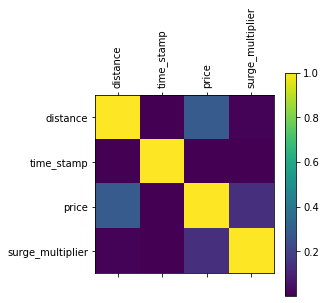

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# convert Spark DataFrame to Pandas DataFrame
cab_pd = cab.toPandas()

# calculate correlation matrix
corr = cab_pd.corr()

# plot correlation matrix
plt.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar()
plt.show()

### Correlation plot for 'weather' dataet

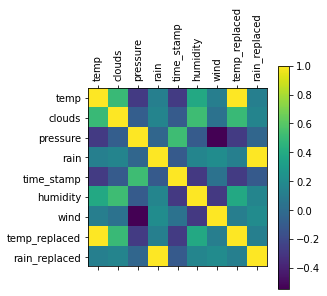

In [ ]:
# convert Spark DataFrame to Pandas DataFrame
weather_pd = weather.toPandas()

# calculate correlation matrix
corr = weather_pd.corr()

# plot correlation matrix
plt.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar()
plt.show()

### Perform clustering using K-Means algorithm

In [ ]:
cab.show()

+--------+--------+-------------+--------------------+--------------------+-----+----------------+--------------------+------------+
|distance|cab_type|   time_stamp|         destination|              source|price|surge_multiplier|          product_id|        name|
+--------+--------+-------------+--------------------+--------------------+-----+----------------+--------------------+------------+
|    1.17|    Lyft|1543584477278|    Haymarket Square|  Financial District|  7.0|             1.0|                lyft|        Lyft|
|    1.03|    Uber|1543451167877|       North Station|           North End|  6.5|             1.0|997acbb5-e102-41e...|    UberPool|
|    1.57|    Uber|1545029110459|           North End|    Theatre District|  9.5|             1.0|55c66225-fbe7-4fd...|       UberX|
|     3.3|    Uber|1544845515963|Northeastern Univ...|  Financial District| 10.5|             1.0|9a0e7b09-b92b-4c4...|         WAV|
|    2.35|    Lyft|1544676311332|   Boston University|         Beacon

In [ ]:
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import necessary libraries
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.clustering import KMeans
import plotly.express as px

# Convert 'cab' dataframe to a vector
vectorAssembler = VectorAssembler(inputCols=["distance", "price"], outputCol="features")
cab_vector = vectorAssembler.transform(cab.select('distance', 'price', 'cab_type')).select('cab_type', 'features')

# Train K-Means model
kmeans = KMeans().setK(2).setSeed(1)
model = kmeans.fit(cab_vector)

# Make predictions
predictions = model.transform(cab_vector)

# Show results
predictions.show()

+--------+-----------+----------+
|cab_type|   features|prediction|
+--------+-----------+----------+
|    Lyft| [1.17,7.0]|         1|
|    Uber| [1.03,6.5]|         1|
|    Uber| [1.57,9.5]|         1|
|    Uber| [3.3,10.5]|         1|
|    Lyft| [2.35,9.0]|         1|
|    Uber|[2.14,29.5]|         0|
|    Lyft| [1.5,30.0]|         0|
|    Uber|[2.61,30.5]|         0|
|    Uber|[1.04,13.5]|         1|
|    Uber|[2.44,10.0]|         1|
|    Lyft|[3.48,27.5]|         0|
|    Uber|[2.61,13.5]|         1|
|    Lyft| [2.91,9.0]|         1|
|    Lyft|[2.49,19.5]|         0|
|    Uber| [2.27,9.5]|         1|
|    Lyft|[2.43,22.5]|         0|
|    Lyft| [2.9,11.0]|         1|
|    Lyft|[2.58,10.5]|         1|
|    Lyft| [1.36,3.5]|         1|
|    Lyft|[1.42,13.5]|         1|
+--------+-----------+----------+
only showing top 20 rows



In [ ]:
predictions_pd = predictions.toPandas()
predictions_pd = predictions_pd.rename(columns={"features": "features_array"})
predictions_pd[["distance", "price"]] = predictions_pd.features_array.apply(pd.Series)
fig = px.scatter(predictions_pd, x="distance", y="price", color="prediction")
fig.show()

### Which visible type of cab has the highest unit price?

In [49]:
# Show the unit price of each type of cab
from pyspark.sql.functions import round

cab = cab.withColumn('unit_price($/mile)', round(cab['price'] / cab['distance'], 2))
cab.show()

+--------+--------+--------------------+--------------------+-----+----------------+--------------------+------------+-------------+------------------+
|distance|cab_type|         destination|              source|price|surge_multiplier|          product_id|        name|    date_hour|unit_price($/mile)|
+--------+--------+--------------------+--------------------+-----+----------------+--------------------+------------+-------------+------------------+
|    1.17|    Lyft|    Haymarket Square|  Financial District|  7.0|             1.0|                lyft|        Lyft|2018-11-30 13|              5.98|
|    1.03|    Uber|       North Station|           North End|  6.5|             1.0|997acbb5-e102-41e...|    UberPool|2018-11-29 00|              6.31|
|    1.57|    Uber|           North End|    Theatre District|  9.5|             1.0|55c66225-fbe7-4fd...|       UberX|2018-12-17 06|              6.05|
|     3.3|    Uber|Northeastern Univ...|  Financial District| 10.5|             1.0|9a0e

In [53]:
import matplotlib.pyplot as plt
from pyspark.sql.functions import col, round, count, asc, desc, avg
from pyspark.sql import functions as F

result_df = cab.groupBy("name", "cab_type").agg(round(F.avg("unit_price($/mile)"), 2).alias("avg_unit_price")).orderBy(F.desc("avg_unit_price"))
result_df.show()

+------------+--------+--------------+
|        name|cab_type|avg_unit_price|
+------------+--------+--------------+
|   Black SUV|    Uber|         19.75|
|Lux Black XL|    Lyft|         19.16|
|   Lux Black|    Lyft|          12.8|
|       Black|    Uber|          12.5|
|         Lux|    Lyft|          9.64|
|        Taxi|    Uber|          9.38|
|      UberXL|    Uber|          9.22|
|     Lyft XL|    Lyft|          8.34|
|         WAV|    Uber|          6.01|
|       UberX|    Uber|          6.01|
|        Lyft|    Lyft|           5.4|
|    UberPool|    Uber|           5.4|
|      Shared|    Lyft|          3.32|
+------------+--------+--------------+



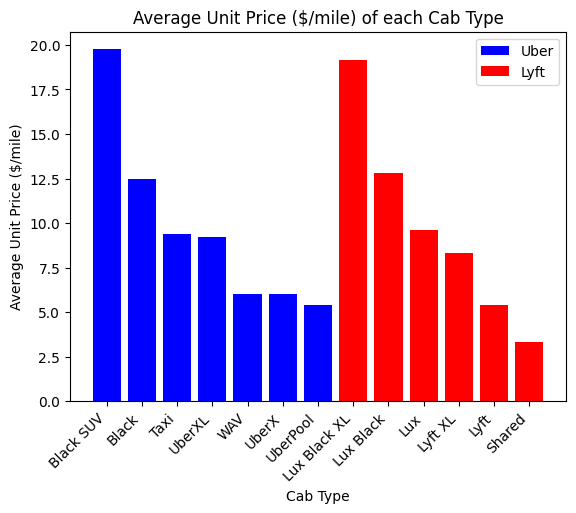

In [58]:
# Create a barplot
fig, ax = plt.subplots()
uber_data = result_df.filter(result_df.cab_type == 'Uber')
lyft_data = result_df.filter(result_df.cab_type == 'Lyft')
ax.bar(uber_data.select("name").rdd.flatMap(lambda x: x).collect(),
        uber_data.select("avg_unit_price").rdd.flatMap(lambda x: x).collect(),
        color='blue', label='Uber')
ax.bar(lyft_data.select("name").rdd.flatMap(lambda x: x).collect(),
        lyft_data.select("avg_unit_price").rdd.flatMap(lambda x: x).collect(),
        color='red', label='Lyft')

# Add labels and title
plt.xlabel("Cab Type")
plt.ylabel("Average Unit Price ($/mile)")
plt.title("Average Unit Price ($/mile) of each Cab Type")
# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add legend
ax.legend()

# Show the plot
plt.show()

### The average price by distance of different cab types

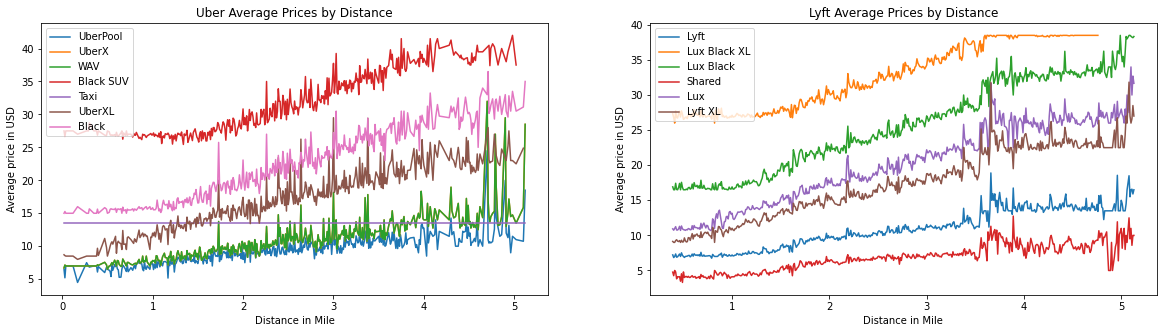

In [ ]:
df_pandas = cab.toPandas()
fig, ax = plt.subplots(1,2 , figsize = (20,5))
for i,col in enumerate(df_pandas[df_pandas['cab_type'] == 'Uber']['name'].unique()):
    ax[0].plot(df_pandas[ df_pandas['name'] == col].groupby('distance').price.mean().index, df_pandas[ df_pandas['name'] == col].groupby('distance').price.mean(), label = col)
ax[0].set_title('Uber Average Prices by Distance')
ax[0].set(xlabel = 'Distance in Mile', ylabel = 'Average price in USD')
ax[0].legend()
for i,col in enumerate(df_pandas[df_pandas['cab_type'] == 'Lyft']['name'].unique()):
    ax[1].plot(df_pandas[ df_pandas['name'] == col].groupby('distance').price.mean().index, df_pandas[ df_pandas['name'] == col].groupby('distance').price.mean(), label = col)
ax[1].set(xlabel = 'Distance in Mile', ylabel = 'Average price in USD')
ax[1].set_title('Lyft Average Prices by Distance')
ax[1].legend()
plt.show()

### Which destinations and starting points are likely to have a price increase?

In [ ]:
distinct_values_count = cab.groupBy('destination').count().collect()

print(f"Distinct values count for destination:")
for row in distinct_values_count:
  print(f"{row['destination']}: {row['count']}")


Distinct values count for destination:
Financial District: 56060
Northeastern University: 55696
North End: 57330
Boston University: 49927
North Station: 56668
Back Bay: 57600
Theatre District: 57521
South Station: 56369
Fenway: 56600
Haymarket Square: 57565
West End: 57264
Beacon Hill: 57198


In [ ]:
distinct_values_count = cab.groupBy('source').count().collect()

print(f"Distinct values count for source:")
for row in distinct_values_count:
  print(f"{row['source']}: {row['count']}")

Distinct values count for source:
Financial District: 48949
Northeastern University: 56581
North End: 57732
Boston University: 56275
North Station: 56995
Back Bay: 55934
Theatre District: 56957
South Station: 57551
Fenway: 56452
Haymarket Square: 57720
West End: 57455
Beacon Hill: 57197


In [ ]:
distinct_values_count = cab.groupBy('surge_multiplier').count().collect()

print(f"Distinct values count for surge_multiplier:")
for row in distinct_values_count:
  print(f"{row['surge_multiplier']}: {row['count']}")

Distinct values count for surge_multiplier:
1.25: 10216
2.5: 123
1.0: 658339
3.0: 7
2.0: 1333
1.5: 4118
1.75: 1662


In [ ]:
new_cab = cab.filter(cab.surge_multiplier != 1)
distinct_values_count = new_cab.groupBy('surge_multiplier').count().collect()

print(f"Distinct values count for surge_multiplier:")
for row in distinct_values_count:
  print(f"{row['surge_multiplier']}: {row['count']}")

Distinct values count for surge_multiplier:
1.25: 10216
2.5: 123
3.0: 7
2.0: 1333
1.5: 4118
1.75: 1662


In [ ]:
result_df = new_cab.groupBy("source", "destination") \
                    .agg(round(F.avg("surge_multiplier"), 2).alias("avg_surge_multiplier")) \
                    .orderBy(F.desc("avg_surge_multiplier"))

result_df.show()

+--------------------+--------------------+--------------------+
|              source|         destination|avg_surge_multiplier|
+--------------------+--------------------+--------------------+
|            Back Bay|Northeastern Univ...|                1.53|
|            Back Bay|    Haymarket Square|                1.52|
|            Back Bay|       South Station|                1.52|
|    Theatre District|       South Station|                1.51|
|            Back Bay|   Boston University|                1.49|
|    Theatre District|   Boston University|                1.49|
|    Theatre District|    Haymarket Square|                1.49|
|            Back Bay|           North End|                1.48|
|    Theatre District|              Fenway|                1.48|
|            Back Bay|              Fenway|                1.48|
|    Theatre District|           North End|                1.47|
|              Fenway|            Back Bay|                1.46|
|   Boston University|   

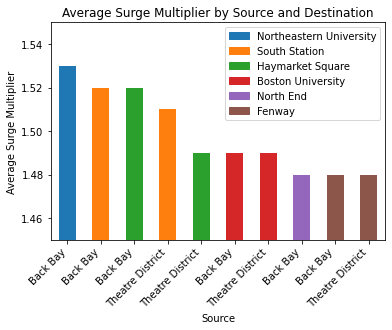

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# convert spark dataframe to pandas dataframe
pandas_df = result_df.toPandas().head(10)

# create a dictionary to map each unique destination to a unique color
destination_colors = {dest: f"C{i}" for i, dest in enumerate(pandas_df['destination'].unique())}

# create bar plot
ax = pandas_df.plot.bar(x="source", y="avg_surge_multiplier", rot=0, color=pandas_df['destination'].map(destination_colors), legend=True)

# set axis labels and title
ax.set_xlabel("Source")
ax.set_ylabel("Average Surge Multiplier")
ax.set_title("Average Surge Multiplier by Source and Destination")
# set y-axis limits
ax.set_ylim(1.45, 1.55)

# create legend using the dictionary of colors
handles = [plt.Rectangle((0,0),1,1, color=color) for color in destination_colors.values()]
labels = destination_colors.keys()
ax.legend(handles, labels)
# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# show plot
plt.show()

### Which locations have the most rains

In [ ]:
result_df = weather.groupBy("location") \
                    .agg(F.avg("rain").alias("avg_rain")) \
                    .orderBy(F.desc("avg_rain"))

result_df.show()

+--------------------+--------------------+
|            location|            avg_rain|
+--------------------+--------------------+
|    Haymarket Square| 0.02130917782026757|
|  Financial District|0.021297705544932963|
|            West End|0.021278393881453042|
|           North End|0.021265009560229347|
|       North Station| 0.02118508604206492|
|    Theatre District| 0.02113881453154864|
|       South Station|0.021044359464627044|
|         Beacon Hill| 0.02094646271510507|
|            Back Bay|0.020631166347992225|
|   Boston University|0.020443785850860336|
|              Fenway|0.020162141491395683|
|Northeastern Univ...| 0.02014837476099419|
+--------------------+--------------------+



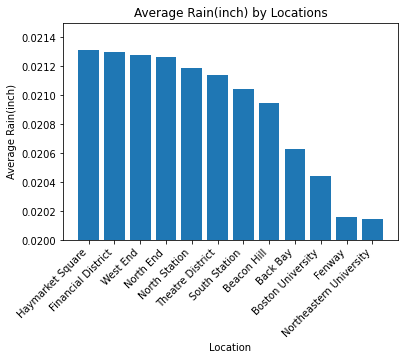

In [ ]:
# Create a barplot and store the axes object
fig, ax = plt.subplots()
ax.bar(result_df.select("location").rdd.flatMap(lambda x: x).collect(),
        result_df.select("avg_rain").rdd.flatMap(lambda x: x).collect())

# Add labels and title
plt.xlabel("Location")
plt.ylabel("Average Rain(inch)")
plt.title("Average Rain(inch) by Locations")

# set y-axis limits
ax.set_ylim(0.0200, 0.0215)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

## Mark's analysis

In [ ]:
weather.show()
cab.show()
weather.count()
cab.count()

+-----+------------------+------+--------+------+----------+--------+-----+-------------+-------------+
| temp|          location|clouds|pressure|  rain|time_stamp|humidity| wind|temp_replaced|rain_replaced|
+-----+------------------+------+--------+------+----------+--------+-----+-------------+-------------+
|37.32|          West End|  0.93| 1017.88|2.0E-4|1543625574|    0.67| 3.11|        37.32|         null|
|46.17|Financial District|   1.0| 1010.16|2.0E-4|1543769574|    0.95| 7.16|        46.17|       2.0E-4|
|44.48|     North Station|  0.92| 1009.04|3.0E-4|1543268108|    0.86| 9.41|        44.48|       2.0E-4|
|45.31|Financial District|  0.91| 1009.03|3.0E-4|1543268108|    0.83|  9.5|        45.31|       3.0E-4|
|46.33|     North Station|   1.0| 1010.17|3.0E-4|1543769574|    0.94|  7.1|        46.33|       3.0E-4|
|46.37|  Haymarket Square|   1.0| 1010.17|3.0E-4|1543769574|    0.94| 7.13|        46.37|       3.0E-4|
|41.34|  Theatre District|  0.95|  991.47|5.0E-4|1543428129|    

675798

In [ ]:
weather=weather.drop('temp','rain')
weather.show()

+------------------+------+--------+----------+--------+-----+-------------+-------------+
|          location|clouds|pressure|time_stamp|humidity| wind|temp_replaced|rain_replaced|
+------------------+------+--------+----------+--------+-----+-------------+-------------+
|          West End|  0.93| 1017.88|1543625574|    0.67| 3.11|        37.32|         null|
|Financial District|   1.0| 1010.16|1543769574|    0.95| 7.16|        46.17|       2.0E-4|
|     North Station|  0.92| 1009.04|1543268108|    0.86| 9.41|        44.48|       2.0E-4|
|Financial District|  0.91| 1009.03|1543268108|    0.83|  9.5|        45.31|       3.0E-4|
|     North Station|   1.0| 1010.17|1543769574|    0.94|  7.1|        46.33|       3.0E-4|
|  Haymarket Square|   1.0| 1010.17|1543769574|    0.94| 7.13|        46.37|       3.0E-4|
|  Theatre District|  0.95|  991.47|1543428129|    0.63| 9.52|        41.34|       3.0E-4|
|       Beacon Hill|  0.51|   997.9|1543457238|     0.7|10.35|        38.41|       5.0E-4|

In [ ]:
weather.count()

6276

In [ ]:
cab.describe().show()

+-------+------------------+--------+--------------------+-----------+--------+------------------+-------------------+--------------------+------+------------------+
|summary|          distance|cab_type|          time_stamp|destination|  source|             price|   surge_multiplier|          product_id|  name|unit_price($/mile)|
+-------+------------------+--------+--------------------+-----------+--------+------------------+-------------------+--------------------+------+------------------+
|  count|            675798|  675798|              675798|     675798|  675798|            675798|             675798|              675798|675798|            675798|
|   mean|2.1144395810575736|    null|1.544045767430331E12|       null|    null|15.860343815755595| 1.0109367000198284|                null|  null| 9.683927948882873|
| stddev|1.0254676267864378|    null| 6.891056954441484E8|       null|    null| 8.272217178922602|0.07845627238784282|                null|  null|14.056865438843625|
|   

#### making a histogram of price between cab type

In [ ]:
from pyspark.ml.feature import Bucketizer

# Create the bucketizer object with the specified boundaries
bucketizer = Bucketizer(splits=[0, 1, 2, 3, 4, 5, 6], inputCol="distance", outputCol="distance_interval")

# Apply the bucketizer to the cab DataFrame
cab = bucketizer.transform(cab)

# Group the data by cab type and distance intervals
grouped_data = cab.groupby(['cab_type', 'distance_interval'])

# Compute the average price for each group
avg_price = grouped_data.mean('price').orderBy('cab_type', 'distance_interval')

# Show the resulting DataFrame
avg_price.show()


+--------+-----------------+------------------+
|cab_type|distance_interval|        avg(price)|
+--------+-----------------+------------------+
|    Lyft|              0.0|12.716165589448131|
|    Lyft|              1.0|14.412164736768084|
|    Lyft|              2.0|17.927775813295614|
|    Lyft|              3.0|20.158200506625096|
|    Lyft|              4.0|21.600409170617652|
|    Lyft|              5.0|22.787564766839377|
|    Uber|              0.0|12.594707359474599|
|    Uber|              1.0|13.728177181901787|
|    Uber|              2.0|16.067244961651262|
|    Uber|              3.0|17.796301446051167|
|    Uber|              4.0|19.847164345970118|
|    Uber|              5.0|19.833333333333332|
+--------+-----------------+------------------+



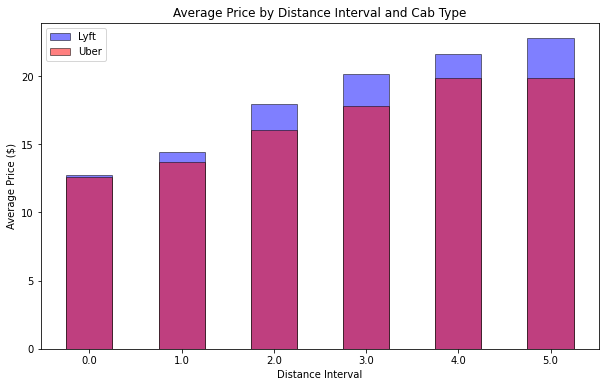

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Convert the DataFrame to a Pandas DataFrame for plotting
avg_price_pd = avg_price.toPandas()

# Loop over the distinct cab types in the DataFrame and plot the average price for each distance interval
fig, ax = plt.subplots(figsize=(10, 6))

for i, row in enumerate(cab.select('cab_type').distinct().collect()):
    cab_type = row[0]
    cab_data = avg_price_pd[avg_price_pd['cab_type'] == cab_type]
    ax.bar(cab_data['distance_interval'].astype(str), cab_data['avg(price)'], alpha=0.5, width=0.5, align='center',
           color=['b', 'r'][i], edgecolor='black', label=cab_type)

# Set the labels and title
ax.set_xlabel('Distance Interval')
ax.set_ylabel('Average Price ($)')
ax.set_title('Average Price by Distance Interval and Cab Type')

# Add a legend
ax.legend()

# Show the plot
plt.show()

In [ ]:
weather_avg=weather.groupBy('location').mean()
weather_avg.show()

+--------------------+------------------+------------------+--------------------+------------------+------------------+------------------+--------------------+
|            location|       avg(clouds)|     avg(pressure)|     avg(time_stamp)|     avg(humidity)|         avg(wind)|avg(temp_replaced)|  avg(rain_replaced)|
+--------------------+------------------+------------------+--------------------+------------------+------------------+------------------+--------------------+
|            West End|0.6772466539196951|1008.4410898661569|1.5438573772141492E9|0.7672657743785837| 6.816233269598468| 38.98281070745697|0.021378160919540323|
|  Financial District|0.6767304015296377|1008.4357934990438| 1.543857377172084E9|0.7548374760994254|6.8600191204588885| 39.41227533460799|0.021337667304015387|
|       North Station|0.6769980879541115|1008.4428107074569|1.5438573772237093E9|0.7655449330783926| 6.835755258126192|39.035105162523905| 0.02129598470363297|
|    Haymarket Square|0.6767112810707469

In [ ]:
# Rename the columns to add '_source' to the end of each column name
weather_source = weather_avg.toDF(*[c + '_source' for c in weather_avg.columns]) \
                          .withColumnRenamed('location_source', 'source')
weather_dest = weather_avg.toDF(*[c + '_destination' for c in weather_avg.columns]) \
                          .withColumnRenamed('location_destination', 'destination')

# Show the resulting DataFrame
weather_source.show()
weather_dest.show()



+--------------------+------------------+--------------------+----------------------+--------------------+------------------+-------------------------+-------------------------+
|              source|avg(clouds)_source|avg(pressure)_source|avg(time_stamp)_source|avg(humidity)_source|  avg(wind)_source|avg(temp_replaced)_source|avg(rain_replaced)_source|
+--------------------+------------------+--------------------+----------------------+--------------------+------------------+-------------------------+-------------------------+
|            West End|0.6772466539196951|  1008.4410898661569|  1.5438573772141492E9|  0.7672657743785837| 6.816233269598468|        38.98281070745697|     0.021378160919540323|
|  Financial District|0.6767304015296377|  1008.4357934990438|   1.543857377172084E9|  0.7548374760994254|6.8600191204588885|        39.41227533460799|     0.021337667304015387|
|       North Station|0.6769980879541115|  1008.4428107074569|  1.5438573772237093E9|  0.7655449330783926| 6.8

In [ ]:
#Merge those weather data (weather_source and weather_dest into cab)
# Join the cab DataFrame with the weather_source DataFrame on the 'source' column
merged_data_source = cab.join(weather_source, 'source')

# Join the merged_data_source DataFrame with the weather_dest DataFrame on the 'destination' column
merged_data = merged_data_source.join(weather_dest, 'destination')

# Show the resulting DataFrame
merged_data.show()


+--------------------+--------------------+--------+--------+-------------+-----+----------------+--------------------+------------+------------------+-----------------+------------------+--------------------+----------------------+--------------------+------------------+-------------------------+-------------------------+-----------------------+-------------------------+---------------------------+-------------------------+---------------------+------------------------------+------------------------------+
|         destination|              source|distance|cab_type|   time_stamp|price|surge_multiplier|          product_id|        name|unit_price($/mile)|distance_interval|avg(clouds)_source|avg(pressure)_source|avg(time_stamp)_source|avg(humidity)_source|  avg(wind)_source|avg(temp_replaced)_source|avg(rain_replaced)_source|avg(clouds)_destination|avg(pressure)_destination|avg(time_stamp)_destination|avg(humidity)_destination|avg(wind)_destination|avg(temp_replaced)_destination|avg(ra

## Henry's Analysis

Find out the top 5 most popular destinations.

In [ ]:
# Create a view for the dataframe
cab.createOrReplaceTempView("cab_view")

df = spark.sql(
    '''
    SELECT c.destination, count(c.destination) 
    FROM cab_view c
    group by c.destination 
    order by count(c.destination) desc
    limit 5
    '''
)
df.show()

+----------------+------------------+
|     destination|count(destination)|
+----------------+------------------+
|        Back Bay|             57600|
|Haymarket Square|             57565|
|Theatre District|             57521|
|       North End|             57330|
|        West End|             57264|
+----------------+------------------+



Now want to find the largest source to the "Financial District" and which cab type people are prefer to take when heading to the "Financial District".

In [ ]:
df = spark.sql(
    '''
    SELECT c.source, count(c.source) 
    FROM cab_view c
    where c.destination = "Financial District"
    group by c.source
    order by count(c.source) desc
    limit 5
    '''
)
df.show()

+--------------------+-------------+
|              source|count(source)|
+--------------------+-------------+
|       South Station|        10342|
|    Haymarket Square|        10132|
|           North End|         9339|
|Northeastern Univ...|         8836|
|              Fenway|         8769|
+--------------------+-------------+



In [ ]:
df = spark.sql(
    '''
    SELECT c.cab_type, count(c.cab_type) 
    FROM cab_view c
    where c.destination = "Financial District"
    group by c.cab_type
    order by count(c.cab_type) desc
    '''
)
df.show()

+--------+---------------+
|cab_type|count(cab_type)|
+--------+---------------+
|    Uber|          31576|
|    Lyft|          24484|
+--------+---------------+



Why more people choose Uber than Lyft to the Financial District? <br>

The first thought is the price and distance, so we look at the average price, average distance and the average rate of differnt cabs from South Station to the Financial District.

In [ ]:
df = spark.sql(
    '''
    SELECT c.cab_type, avg(c.price) as avg_price, avg(c.distance) as avg_dis, (avg(c.price) / avg(c.distance)) as avg_price_dis_rate
    FROM cab_view c
    where (c.source = "South Station") and (c.destination = "Financial District")
    group by c.cab_type
    '''
)
df.show()

+--------+------------------+------------------+------------------+
|cab_type|         avg_price|           avg_dis|avg_price_dis_rate|
+--------+------------------+------------------+------------------+
|    Lyft|12.685510071474983|0.6091921160927006|20.823496785937774|
|    Uber|12.322532751091703|0.5945903930131247| 20.72440607162602|
+--------+------------------+------------------+------------------+



**Insight**: <br>

Cabs are mostly used to take people to "Financial District", those people are mostly taking cabs from "South Station", and more people choose to take Uber to the "Financial District" than Lyft, because in aveage, not only the price but also the distrance by take Uber from South Station to Financial District are lower than taking Lyft.

## Part 5: Dashoard

In [ ]:
!pip install voila

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install panel
import panel as pn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Launching server at http://localhost:43615


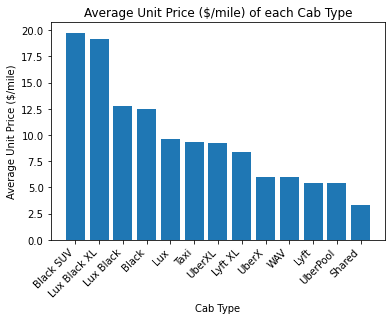

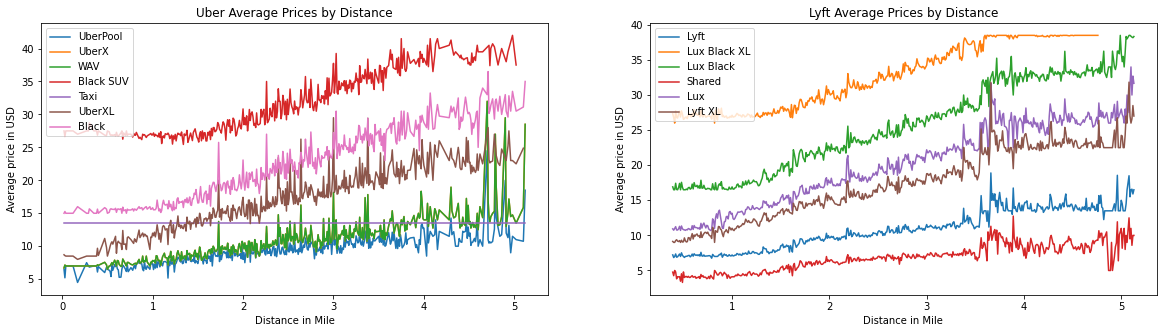

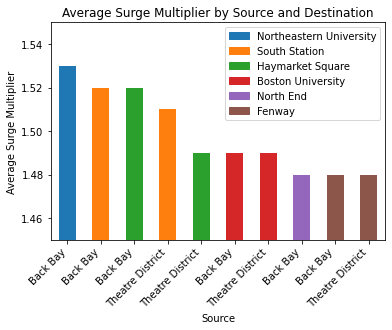

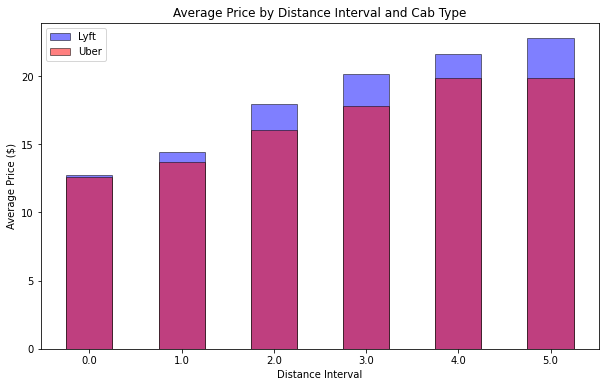

In [ ]:
# Add metadata to the notebook to specify the grid layout
metadata = {
    'voila': {
        'template': 'gridstack',
        'gridstack_options': {
            'cellHeight': '300px',
            'verticalMargin': '20px'
        }
    }
}

# 1st plot
result_df = cab.groupBy("name").agg(round(F.avg("unit_price($/mile)"), 2).alias("avg_unit_price")).orderBy(F.desc("avg_unit_price"))
# Create a barplot
plt.bar(result_df.select("name").rdd.flatMap(lambda x: x).collect(),
        result_df.select("avg_unit_price").rdd.flatMap(lambda x: x).collect())
# Add labels and title
plt.xlabel("Cab Type")
plt.ylabel("Average Unit Price ($/mile)")
plt.title("Average Unit Price ($/mile) of each Cab Type")
# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')


# 2nd plot
df_pandas = cab.toPandas()
fig, ax = plt.subplots(1,2 , figsize = (20,5))
for i,col in enumerate(df_pandas[df_pandas['cab_type'] == 'Uber']['name'].unique()):
    ax[0].plot(df_pandas[ df_pandas['name'] == col].groupby('distance').price.mean().index, df_pandas[ df_pandas['name'] == col].groupby('distance').price.mean(), label = col)
ax[0].set_title('Uber Average Prices by Distance')
ax[0].set(xlabel = 'Distance in Mile', ylabel = 'Average price in USD')
ax[0].legend()
for i,col in enumerate(df_pandas[df_pandas['cab_type'] == 'Lyft']['name'].unique()):
    ax[1].plot(df_pandas[ df_pandas['name'] == col].groupby('distance').price.mean().index, df_pandas[ df_pandas['name'] == col].groupby('distance').price.mean(), label = col)
ax[1].set(xlabel = 'Distance in Mile', ylabel = 'Average price in USD')
ax[1].set_title('Lyft Average Prices by Distance')
ax[1].legend()


# 3rd plot
result_df = new_cab.groupBy("source", "destination") \
                    .agg(round(F.avg("surge_multiplier"), 2).alias("avg_surge_multiplier")) \
                    .orderBy(F.desc("avg_surge_multiplier"))
# convert spark dataframe to pandas dataframe
pandas_df = result_df.toPandas().head(10)
# create a dictionary to map each unique destination to a unique color
destination_colors = {dest: f"C{i}" for i, dest in enumerate(pandas_df['destination'].unique())}
# create bar plot
ax = pandas_df.plot.bar(x="source", y="avg_surge_multiplier", rot=0, color=pandas_df['destination'].map(destination_colors), legend=True)
# set axis labels and title
ax.set_xlabel("Source")
ax.set_ylabel("Average Surge Multiplier")
ax.set_title("Average Surge Multiplier by Source and Destination")
# set y-axis limits
ax.set_ylim(1.45, 1.55)
# create legend using the dictionary of colors
handles = [plt.Rectangle((0,0),1,1, color=color) for color in destination_colors.values()]
labels = destination_colors.keys()
ax.legend(handles, labels)
# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')


# 4th plot
# Convert the DataFrame to a Pandas DataFrame for plotting
avg_price_pd = avg_price.toPandas()
# Loop over the distinct cab types in the DataFrame and plot the average price for each distance interval
fig, ax = plt.subplots(figsize=(10, 6))
for i, row in enumerate(cab.select('cab_type').distinct().collect()):
    cab_type = row[0]
    cab_data = avg_price_pd[avg_price_pd['cab_type'] == cab_type]
    ax.bar(cab_data['distance_interval'].astype(str), cab_data['avg(price)'], alpha=0.5, width=0.5, align='center',
           color=['b', 'r'][i], edgecolor='black', label=cab_type)
# Set the labels and title
ax.set_xlabel('Distance Interval')
ax.set_ylabel('Average Price ($)')
ax.set_title('Average Price by Distance Interval and Cab Type')
# Add a legend
ax.legend()


from IPython.display import display
# 1st table
df1 = spark.sql(
    '''
    SELECT c.destination, count(c.destination) 
    FROM cab_view c
    group by c.destination 
    order by count(c.destination) desc
    limit 5
    '''
)


# 2nd table
df2 = spark.sql(
    '''
    SELECT c.source, count(c.source) 
    FROM cab_view c
    where c.destination = "Financial District"
    group by c.source
    order by count(c.source) desc
    limit 5
    '''
)


# 3rd tale
df3 = spark.sql(
    '''
    SELECT c.cab_type, count(c.cab_type) 
    FROM cab_view c
    where c.destination = "Financial District"
    group by c.cab_type
    order by count(c.cab_type) desc
    '''
)


# 4th table
df4 = spark.sql(
    '''
    SELECT c.cab_type, avg(c.price) as avg_price, avg(c.distance) as avg_dis, (avg(c.price) / avg(c.distance)) as avg_price_dis_rate
    FROM cab_view c
    where (c.source = "South Station") and (c.destination = "Financial District")
    group by c.cab_type
    '''
)


dashboard = pn.Tabs(
    ("Average Unit Price", plt.figure(1)),
    ("Average Prices by Distance", pn.Row(pn.Column(plt.figure(2).get_axes()[0]), pn.Column(plt.figure(2).get_axes()[1]))),
    ("Average Surge Multiplier", plt.figure(3)),
    ("Average Price by Distance Interval and Cab Type", plt.figure(4))
)

dashboard.show()


import pandas as pd

# convert PySpark DataFrame to pandas DataFrame
df1_pd = df1.toPandas()
df2_pd = df2.toPandas()
df3_pd = df3.toPandas()
df4_pd = df4.toPandas()

# create a 2x2 grid of tables
table1 = df1_pd.head().to_html()
table2 = df2_pd.to_html()
table3 = df3_pd.to_html()
table4 = df4_pd.to_html()

# display the tables in a 2x2 grid using HTML
from IPython.display import display, HTML

display(HTML(f"<table><tr><td>{table1}</td><td>{table2}</td></tr><tr><td>{table3}</td><td>{table4}</td></tr></table>"))


## Part 6: Further Analysis

### Merge 'cap' and 'weather' datasets

#### Create 'dest_weather' and 'source_weather' datasets

In [ ]:
dest_weather = weather \
    .withColumnRenamed('location', 'destination') \
    .withColumnRenamed('temp', 'dest_temp') \
    .withColumnRenamed('clouds', 'dest_clouds') \
    .withColumnRenamed('pressure', 'dest_pressure') \
    .withColumnRenamed('rain', 'dest_rain') \
    .withColumnRenamed('humidity', 'dest_humidity') \
    .withColumnRenamed('wind', 'dest_wind') \
    .withColumnRenamed('date_hour', 'date_hour')

dest_weather.show(10)

+---------+--------------------+-----------+-------------+---------+-------------+---------+-------------+
|dest_temp|         destination|dest_clouds|dest_pressure|dest_rain|dest_humidity|dest_wind|    date_hour|
+---------+--------------------+-----------+-------------+---------+-------------+---------+-------------+
|    28.86|           North End|       0.28|      1021.47|   0.0148|          0.6|     5.24|2018-12-10 02|
|    38.82|            Back Bay|       0.76|       996.84|   0.0148|          0.7|     9.72|2018-11-29 00|
|    39.36|       North Station|       0.82|       995.66|   0.0148|         0.66|    10.95|2018-11-28 23|
|    45.09|   Boston University|        1.0|       989.05|   0.0148|         0.93|     1.39|2018-11-27 12|
|    42.79|  Financial District|        1.0|      1011.51|    0.047|          0.8|    10.96|2018-12-17 00|
|    33.25|   Boston University|       0.84|      1020.02|   0.0148|         0.79|     4.31|2018-12-01 08|
|    36.24|Northeastern Univ...|     

In [ ]:
from pyspark.sql.functions import round

dest_avg = dest_weather.groupBy('destination', 'date_hour').mean()
dest_avg = dest_avg.select('destination', 'date_hour', round('avg(dest_clouds)', 2).alias('dest_clouds'), round('avg(dest_pressure)', 2).alias('dest_pressure'), round('avg(dest_temp)', 2).alias('dest_temp'), round('avg(dest_rain)', 6).alias('dest_rain'), round('avg(dest_humidity)', 2).alias('dest_humidity'), round('avg(dest_wind)', 2).alias('dest_wind'),)

dest_avg.show(10)

+-----------------+-------------+-----------+-------------+---------+---------+-------------+---------+
|      destination|    date_hour|dest_clouds|dest_pressure|dest_temp|dest_rain|dest_humidity|dest_wind|
+-----------------+-------------+-----------+-------------+---------+---------+-------------+---------+
| Haymarket Square|2018-11-28 07|       0.24|       991.65|     35.0|   0.0148|         0.79|     6.38|
|         Back Bay|2018-11-29 06|       0.78|      1000.33|    37.82|   0.0148|          0.7|     10.2|
|    South Station|2018-12-17 07|        1.0|      1005.16|    39.21|   0.0148|         0.89|    10.86|
|        North End|2018-11-30 04|        0.0|      1013.71|    35.11|   0.0148|          0.7|     5.26|
| Haymarket Square|2018-11-26 21|       0.96|      1009.08|    44.69|   0.0148|         0.86|     9.38|
| Theatre District|2018-11-30 21|       0.93|      1017.15|    39.41|   0.0148|         0.63|     2.64|
|           Fenway|2018-11-30 07|        0.0|      1015.06|    3

In [ ]:
dest_avg.count()

3960

In [ ]:
source_weather = weather \
    .withColumnRenamed('location', 'source') \
    .withColumnRenamed('temp', 'source_temp') \
    .withColumnRenamed('clouds', 'source_clouds') \
    .withColumnRenamed('pressure', 'source_pressure') \
    .withColumnRenamed('rain', 'source_rain') \
    .withColumnRenamed('humidity', 'source_humidity') \
    .withColumnRenamed('wind', 'source_wind') \
    .withColumnRenamed('date_hour', 'date_hour')

source_weather.show(10)

+-----------+--------------------+-------------+---------------+-----------+---------------+-----------+-------------+
|source_temp|              source|source_clouds|source_pressure|source_rain|source_humidity|source_wind|    date_hour|
+-----------+--------------------+-------------+---------------+-----------+---------------+-----------+-------------+
|      28.86|           North End|         0.28|        1021.47|     0.0148|            0.6|       5.24|2018-12-10 02|
|      38.82|            Back Bay|         0.76|         996.84|     0.0148|            0.7|       9.72|2018-11-29 00|
|      39.36|       North Station|         0.82|         995.66|     0.0148|           0.66|      10.95|2018-11-28 23|
|      45.09|   Boston University|          1.0|         989.05|     0.0148|           0.93|       1.39|2018-11-27 12|
|      42.79|  Financial District|          1.0|        1011.51|      0.047|            0.8|      10.96|2018-12-17 00|
|      33.25|   Boston University|         0.84|

In [ ]:
from pyspark.sql.functions import round

source_avg = source_weather.groupBy('source', 'date_hour').mean()
source_avg = source_avg.select('source', 'date_hour', round('avg(source_clouds)', 2).alias('source_clouds'), round('avg(source_pressure)', 2).alias('source_pressure'), round('avg(source_temp)', 2).alias('source_temp'), round('avg(source_rain)', 6).alias('source_rain'), round('avg(source_humidity)', 2).alias('source_humidity'), round('avg(source_wind)', 2).alias('source_wind'),)

source_avg.show(10)

+-----------------+-------------+-------------+---------------+-----------+-----------+---------------+-----------+
|           source|    date_hour|source_clouds|source_pressure|source_temp|source_rain|source_humidity|source_wind|
+-----------------+-------------+-------------+---------------+-----------+-----------+---------------+-----------+
| Haymarket Square|2018-11-28 07|         0.24|         991.65|       35.0|     0.0148|           0.79|       6.38|
|         Back Bay|2018-11-29 06|         0.78|        1000.33|      37.82|     0.0148|            0.7|       10.2|
|    South Station|2018-12-17 07|          1.0|        1005.16|      39.21|     0.0148|           0.89|      10.86|
|        North End|2018-11-30 04|          0.0|        1013.71|      35.11|     0.0148|            0.7|       5.26|
| Haymarket Square|2018-11-26 21|         0.96|        1009.08|      44.69|     0.0148|           0.86|       9.38|
| Theatre District|2018-11-30 21|         0.93|        1017.15|      39.

In [ ]:
source_avg.count()

3960

#### Merge 'cap', 'source_weather' and 'dest_weather'

In [ ]:
merged_1 = cab.join(source_avg, on=['source','date_hour'], how='left')

In [ ]:
merged_1.count()

675798

In [ ]:
merged_1.show(10)

+--------------------+-------------+--------+--------+--------------------+-----+----------------+--------------------+------------+-------------+---------------+-----------+-----------+---------------+-----------+
|              source|    date_hour|distance|cab_type|         destination|price|surge_multiplier|          product_id|        name|source_clouds|source_pressure|source_temp|source_rain|source_humidity|source_wind|
+--------------------+-------------+--------+--------+--------------------+-----+----------------+--------------------+------------+-------------+---------------+-----------+-----------+---------------+-----------+
|  Financial District|2018-11-30 13|    1.17|    Lyft|    Haymarket Square|  7.0|             1.0|                lyft|        Lyft|         0.05|         1017.3|      34.45|     0.0148|           0.75|       2.01|
|           North End|2018-11-29 00|    1.03|    Uber|       North Station|  6.5|             1.0|997acbb5-e102-41e...|    UberPool|        

In [ ]:
data = merged_1.join(dest_avg, on=['destination', 'date_hour'], how='left')

In [ ]:
data.count()

675798

In [ ]:
data.show(10)

+--------------------+-------------+--------------------+--------+--------+-----+----------------+--------------------+------------+-------------+---------------+-----------+-----------+---------------+-----------+-----------+-------------+---------+---------+-------------+---------+
|         destination|    date_hour|              source|distance|cab_type|price|surge_multiplier|          product_id|        name|source_clouds|source_pressure|source_temp|source_rain|source_humidity|source_wind|dest_clouds|dest_pressure|dest_temp|dest_rain|dest_humidity|dest_wind|
+--------------------+-------------+--------------------+--------+--------+-----+----------------+--------------------+------------+-------------+---------------+-----------+-----------+---------------+-----------+-----------+-------------+---------+---------+-------------+---------+
|    Haymarket Square|2018-11-30 13|  Financial District|    1.17|    Lyft|  7.0|             1.0|                lyft|        Lyft|         0.05

#### Clean the merged dataset

In [ ]:
data.count()

675798

In [ ]:
# Drop duplicated values
data = data.dropDuplicates()
data.count()

598403

In [ ]:
# count the number of missing values for each column
missing_values = data.agg(*[sum(col(c).isNull().cast("int")).alias(c) for c in data.columns])

# show the result
missing_values.show()

+-----------+---------+------+--------+--------+-----+----------------+----------+----+-------------+---------------+-----------+-----------+---------------+-----------+-----------+-------------+---------+---------+-------------+---------+
|destination|date_hour|source|distance|cab_type|price|surge_multiplier|product_id|name|source_clouds|source_pressure|source_temp|source_rain|source_humidity|source_wind|dest_clouds|dest_pressure|dest_temp|dest_rain|dest_humidity|dest_wind|
+-----------+---------+------+--------+--------+-----+----------------+----------+----+-------------+---------------+-----------+-----------+---------------+-----------+-----------+-------------+---------+---------+-------------+---------+
|          0|        0|     0|       0|       0|    0|               0|         0|   0|         2703|           2703|       2703|       2703|           2703|       2703|       2703|         2703|     2703|     2703|         2703|     2703|
+-----------+---------+------+--------+-

In [ ]:
# remove missing values
data = data.na.drop()
data.count()

595700

In [ ]:
data.show(10)

+------------------+-------------+--------------------+--------+--------+-----+----------------+--------------------+---------+-------------+---------------+-----------+-----------+---------------+-----------+-----------+-------------+---------+---------+-------------+---------+
|       destination|    date_hour|              source|distance|cab_type|price|surge_multiplier|          product_id|     name|source_clouds|source_pressure|source_temp|source_rain|source_humidity|source_wind|dest_clouds|dest_pressure|dest_temp|dest_rain|dest_humidity|dest_wind|
+------------------+-------------+--------------------+--------+--------+-----+----------------+--------------------+---------+-------------+---------------+-----------+-----------+---------------+-----------+-----------+-------------+---------+---------+-------------+---------+
|  Theatre District|2018-11-29 00|Northeastern Univ...|    2.19|    Lyft| 22.5|             1.0|            lyft_lux|Lux Black|         0.76|         996.73|   

### Preprocessing for models

In [ ]:
data.printSchema()

root
 |-- destination: string (nullable = true)
 |-- date_hour: string (nullable = true)
 |-- source: string (nullable = true)
 |-- distance: double (nullable = true)
 |-- cab_type: string (nullable = true)
 |-- price: double (nullable = true)
 |-- surge_multiplier: double (nullable = true)
 |-- product_id: string (nullable = true)
 |-- name: string (nullable = true)
 |-- source_clouds: double (nullable = true)
 |-- source_pressure: double (nullable = true)
 |-- source_temp: double (nullable = true)
 |-- source_rain: double (nullable = true)
 |-- source_humidity: double (nullable = true)
 |-- source_wind: double (nullable = true)
 |-- dest_clouds: double (nullable = true)
 |-- dest_pressure: double (nullable = true)
 |-- dest_temp: double (nullable = true)
 |-- dest_rain: double (nullable = true)
 |-- dest_humidity: double (nullable = true)
 |-- dest_wind: double (nullable = true)



In [ ]:
# Drop useless column 'product_id'
data = data.drop('product_id')

In [ ]:
from pyspark.sql.functions import split, col

# Split date_hour column into date and hour columns
data = data.withColumn('date', split(col('date_hour'), ' ')[0])
data = data.withColumn('hour', split(col('date_hour'), ' ')[1])

# Show the resulting DataFrame
data.show(10)

+------------------+-------------+--------------------+--------+--------+-----+----------------+---------+-------------+---------------+-----------+-----------+---------------+-----------+-----------+-------------+---------+---------+-------------+---------+----------+----+
|       destination|    date_hour|              source|distance|cab_type|price|surge_multiplier|     name|source_clouds|source_pressure|source_temp|source_rain|source_humidity|source_wind|dest_clouds|dest_pressure|dest_temp|dest_rain|dest_humidity|dest_wind|      date|hour|
+------------------+-------------+--------------------+--------+--------+-----+----------------+---------+-------------+---------------+-----------+-----------+---------------+-----------+-----------+-------------+---------+---------+-------------+---------+----------+----+
|  Theatre District|2018-11-29 00|Northeastern Univ...|    2.19|    Lyft| 22.5|             1.0|Lux Black|         0.76|         996.73|      38.61|     0.0148|            0.7

In [ ]:
# Convert 'date' to 'weekday'
from pyspark.sql.functions import date_format

data = data.withColumn("weekday", date_format(data["date"], "E"))
data.show(10)

+------------------+-------------+--------------------+--------+--------+-----+----------------+---------+-------------+---------------+-----------+-----------+---------------+-----------+-----------+-------------+---------+---------+-------------+---------+----------+----+-------+
|       destination|    date_hour|              source|distance|cab_type|price|surge_multiplier|     name|source_clouds|source_pressure|source_temp|source_rain|source_humidity|source_wind|dest_clouds|dest_pressure|dest_temp|dest_rain|dest_humidity|dest_wind|      date|hour|weekday|
+------------------+-------------+--------------------+--------+--------+-----+----------------+---------+-------------+---------------+-----------+-----------+---------------+-----------+-----------+-------------+---------+---------+-------------+---------+----------+----+-------+
|  Theatre District|2018-11-29 00|Northeastern Univ...|    2.19|    Lyft| 22.5|             1.0|Lux Black|         0.76|         996.73|      38.61|   

In [ ]:
data = data.drop('date_hour', 'day', 'date')

In [ ]:
data.show(10)

+------------------+--------------------+--------+--------+-----+----------------+---------+-------------+---------------+-----------+-----------+---------------+-----------+-----------+-------------+---------+---------+-------------+---------+----+-------+
|       destination|              source|distance|cab_type|price|surge_multiplier|     name|source_clouds|source_pressure|source_temp|source_rain|source_humidity|source_wind|dest_clouds|dest_pressure|dest_temp|dest_rain|dest_humidity|dest_wind|hour|weekday|
+------------------+--------------------+--------+--------+-----+----------------+---------+-------------+---------------+-----------+-----------+---------------+-----------+-----------+-------------+---------+---------+-------------+---------+----+-------+
|  Theatre District|Northeastern Univ...|    2.19|    Lyft| 22.5|             1.0|Lux Black|         0.76|         996.73|      38.61|     0.0148|            0.7|      10.39|       0.76|       996.69|    38.61|   0.0148|      

### Further analysis on hour and weekday

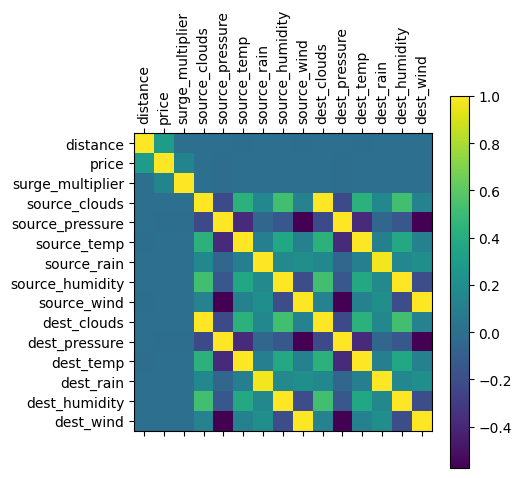

In [ ]:
# convert Spark DataFrame to Pandas DataFrame
data_pd = data.toPandas()

# calculate correlation matrix
corr = data_pd.corr()

# plot correlation matrix
plt.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar()
plt.show()

In [ ]:
from pyspark.sql import functions as F
result_df = data.groupBy("weekday") \
                    .agg(round(F.avg("price"), 2).alias("avg_price")) \
                    .orderBy(F.desc("avg_price"))

result_df.show(3)

+-------+---------+
|weekday|avg_price|
+-------+---------+
|    Wed|    16.24|
|    Thu|    16.16|
|    Tue|    16.13|
+-------+---------+
only showing top 3 rows



After we calculate the average price grouping by each weekday, we found that **Wednesday has the highest average price for taking cabs, followed by Thursday and Tuesday.**

In [ ]:
from pyspark.sql import functions as F
result_df = data.groupBy("hour") \
                    .agg(round(F.avg("price"), 2).alias("avg_price")) \
                    .orderBy(F.desc("avg_price"))

result_df.show(2)

+----+---------+
|hour|avg_price|
+----+---------+
|  22|    16.19|
|  08|    16.17|
+----+---------+
only showing top 2 rows



And if we calculating the average cab price by grouping hourly, we found that **the most expensive time for taking cabs are 10 pm and 8 am.**

In [ ]:
from pyspark.sql import functions as F
result_df = data.groupBy("weekday", "hour") \
                    .agg(round(F.avg("price"), 2).alias("avg_price")) \
                    .orderBy(F.desc("avg_price"))

result_df.show(5)

+-------+----+---------+
|weekday|hour|avg_price|
+-------+----+---------+
|    Wed|  17|    16.48|
|    Wed|  22|    16.47|
|    Tue|  21|    16.46|
|    Tue|  08|    16.38|
|    Thu|  00|    16.37|
+-------+----+---------+
only showing top 5 rows



Then we combine the weekdays and hours to calculate the average cab price, we found that top 5 expensive periods are: Wednesday 5pm and 10pm, Tuesday 9pm and 8 am, and Thursday 12 am.

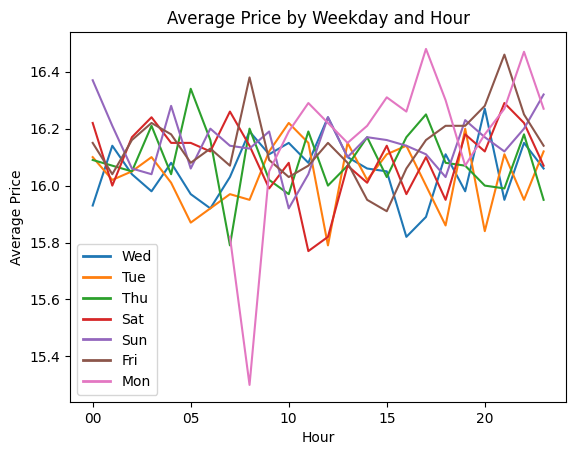

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# convert spark dataframe to pandas dataframe
pandas_df = result_df.toPandas()

# create a dictionary to map each unique destination to a unique color
weekday_colors = {dest: f"C{i}" for i, dest in enumerate(pandas_df['weekday'].unique())}

# create line plot
ax = pandas_df.pivot(index='hour', columns='weekday', values='avg_price') \
    .plot.line(color=[weekday_colors[d] for d in pandas_df['weekday'].unique()], legend=True)

# set axis labels and title
ax.set_xlabel("Hour")
ax.set_ylabel("Average Price")
ax.set_title("Average Price by Weekday and Hour")

# create legend using the dictionary of colors
handles = [plt.Line2D([0,0],[0,0], color=color, linewidth=2) for color in weekday_colors.values()]
labels = weekday_colors.keys()
ax.legend(handles, labels)

# show plot
plt.show()

We also draw lines to show the average cab price change hourly grouped by weekdays. **Most of the time the average price flctuates from 15.8 to 16.4. The average cab price reaches the bottom on the Monday morning.**

We want to figure out the reason behind these price changes, the first thing we think about is to look at the demand of cabs during each period of time. To get the number of demands of cab rides, we count the number of price used to calculate the average price during each time period.

In [ ]:
from pyspark.sql import functions as F

result_df = data.groupBy("hour") \
                .agg(round(F.avg("price"), 2).alias("avg_price"), 
                     F.count("*").alias('cab_demand')) \
                .orderBy(F.asc("hour"))

result_df.show()

+----+---------+----------+
|hour|avg_price|cab_demand|
+----+---------+----------+
|  00|    16.14|     27609|
|  01|    16.08|     23654|
|  02|    16.09|     24598|
|  03|    16.14|     24099|
|  04|    16.14|     24435|
|  05|    16.07|     21994|
|  06|    16.07|     22592|
|  07|    16.04|     21934|
|  08|    16.17|     21207|
|  09|    16.09|     25260|
|  10|    16.09|     26112|
|  11|    16.09|     26088|
|  12|    16.06|     26252|
|  13|    16.11|     26043|
|  14|    16.08|     26127|
|  15|     16.1|     25954|
|  16|    16.08|     26103|
|  17|    16.14|     26300|
|  18|    16.07|     26115|
|  19|    16.14|     23412|
+----+---------+----------+
only showing top 20 rows



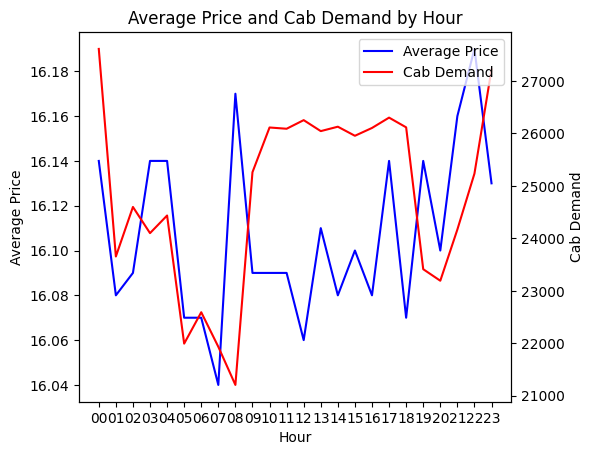

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# convert spark dataframe to pandas dataframe
pandas_df = result_df.toPandas()

# create figure and axis objects
fig, ax1 = plt.subplots()

# plot first line on first y-axis
ax1.set_xlabel("Hour")
ax1.set_ylabel("Average Price")
ax1.plot(pandas_df['hour'], pandas_df['avg_price'], color='blue', label='Average Price')

# create second y-axis
ax2 = ax1.twinx()

# plot second line on second y-axis
ax2.set_ylabel("Cab Demand")
ax2.plot(pandas_df['hour'], pandas_df['cab_demand'], color='red', label='Cab Demand')

# set title
plt.title("Average Price and Cab Demand by Hour")

# add legend and adjust spacing between the two y-axes
fig.legend(loc='upper right', bbox_to_anchor=(1, 1), bbox_transform=ax1.transAxes)
fig.subplots_adjust(right=0.8)

# show plot
plt.show()

We create trend lines for both the average price and cab demand **hourly**, and we could see that there is certain relationship between those two.

Then we also would like to see if there is a relationship between cab prices and demands by weekdays.

In [ ]:
from pyspark.sql.functions import round, avg, count

result_df = data.groupBy("weekday") \
                .agg(round(avg("price"), 2).alias("avg_price"), 
                     count("*").alias('cab_demand')) \

result_df.show()

+-------+---------+----------+
|weekday|avg_price|cab_demand|
+-------+---------+----------+
|    Sun|    16.09|     80662|
|    Mon|    16.03|    109488|
|    Thu|    16.16|     84369|
|    Sat|    16.09|     79388|
|    Wed|    16.24|     57840|
|    Fri|    16.05|     79289|
|    Tue|    16.13|    104664|
+-------+---------+----------+



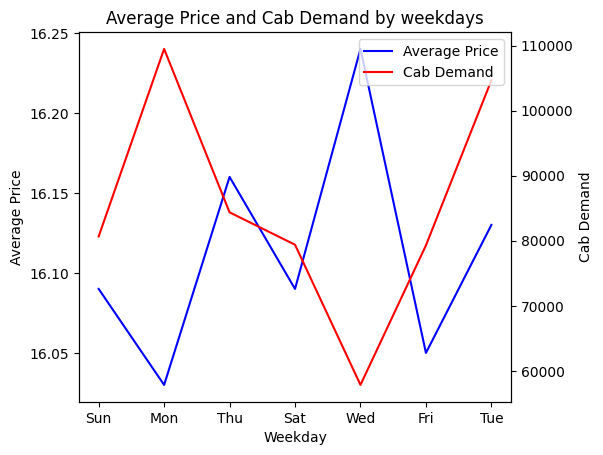

In [ ]:
# convert spark dataframe to pandas dataframe
pandas_df = result_df.toPandas()

# create figure and axis objects
fig, ax1 = plt.subplots()

# plot first line on first y-axis
ax1.set_xlabel("Weekday")
ax1.set_ylabel("Average Price")
ax1.plot(pandas_df['weekday'], pandas_df['avg_price'], color='blue', label='Average Price')

# create second y-axis
ax2 = ax1.twinx()

# plot second line on second y-axis
ax2.set_ylabel("Cab Demand")
ax2.plot(pandas_df['weekday'], pandas_df['cab_demand'], color='red', label='Cab Demand')

# set title
plt.title("Average Price and Cab Demand by weekdays")

# add legend and adjust spacing between the two y-axes
fig.legend(loc='upper right', bbox_to_anchor=(1, 1), bbox_transform=ax1.transAxes)
fig.subplots_adjust(right=0.8)

# show plot
plt.show()

When looking at relationship by weekdys, since the number of data is fewer compared to hourly, the relationship is less obvious than the realtionship hourly.

In [ ]:
pandas_data = data.toPandas()

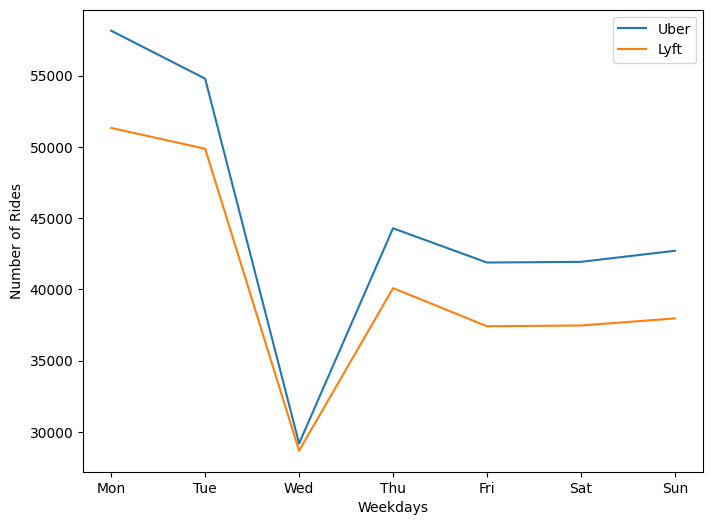

In [ ]:
# The distribution of rides in weekdays 
uber_day_count = pandas_data[pandas_data['cab_type'] == 'Uber']['weekday'].value_counts()
uber_day_count = uber_day_count.reindex(index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri','Sat','Sun'])
lyft_day_count = pandas_data[pandas_data['cab_type'] == 'Lyft']['weekday'].value_counts()
lyft_day_count = lyft_day_count.reindex(index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri','Sat','Sun'])

fig , ax = plt.subplots(figsize = (8,6))
ax.plot(uber_day_count.index, uber_day_count, label = 'Uber')
ax.plot(lyft_day_count.index, lyft_day_count, label = 'Lyft')
ax.set(ylabel = 'Number of Rides', xlabel = 'Weekdays')
ax.legend()
plt.show()

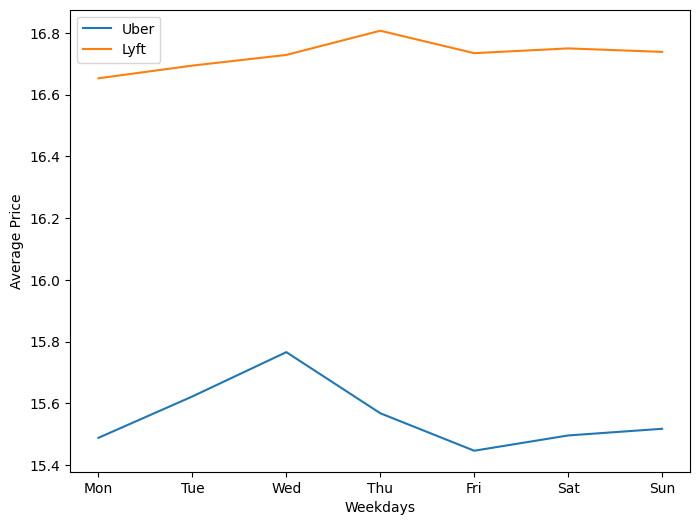

In [ ]:
# The distribution of average price in weekdays 
uber_avg_price = pandas_data[pandas_data['cab_type'] == 'Uber'].groupby('weekday')['price'].mean()
uber_avg_price = uber_avg_price.reindex(index=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
lyft_avg_price = pandas_data[pandas_data['cab_type'] == 'Lyft'].groupby('weekday')['price'].mean()
lyft_avg_price = lyft_avg_price.reindex(index=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(uber_avg_price.index, uber_avg_price, label='Uber')
ax.plot(lyft_avg_price.index, lyft_avg_price, label='Lyft')
ax.set(ylabel='Average Price', xlabel='Weekdays')
ax.legend()
plt.show()

In [ ]:
data.describe().show()

+-------+-----------+--------+------------------+--------+-----------------+-------------------+------+------------------+------------------+------------------+--------------------+-------------------+------------------+------------------+------------------+-----------------+--------------------+-------------------+------------------+------------------+-------+
|summary|destination|  source|          distance|cab_type|            price|   surge_multiplier|  name|     source_clouds|   source_pressure|       source_temp|         source_rain|    source_humidity|       source_wind|       dest_clouds|     dest_pressure|        dest_temp|           dest_rain|      dest_humidity|         dest_wind|              hour|weekday|
+-------+-----------+--------+------------------+--------+-----------------+-------------------+------+------------------+------------------+------------------+--------------------+-------------------+------------------+------------------+------------------+--------------

Here we would like to investigate if there is any relatinship between the weather conditions and the average price, demands of cab rides. The most commoned thought regarding the weather and the cab rides might be that: <br>
if the rainy day would affect both the price and demand of cab? <br>

Therefore, we would like to investigate this relationship here:

We could see from the decription above that: the range of both the source and destination percipitaion is from 0.0002 (almost 0) to 0.40. Therefore, we decide to divide the percipitaion range into 8 smaller gaps of 0.05, so that it is better to see the trend.

In [ ]:
from pyspark.sql.functions import when

# Define the different ranges for source_rain
range_1 = (0.0, 0.05)
range_2 = (0.05, 0.1)
range_3 = (0.1, 0.15)
range_4 = (0.15, 0.2)
range_5 = (0.2, 0.25)
range_6 = (0.25, 0.3)
range_7 = (0.3, 0.35)
range_8 = (0.35, 0.4)

# Use the when function to assign a new variable based on the range of source_rain
data = data.withColumn("source_rain_range", 
                       when((data["source_rain"] >= range_1[0]) & (data["source_rain"] < range_1[1]), "0.00_0.05")
                       .when((data["source_rain"] >= range_2[0]) & (data["source_rain"] < range_2[1]), "0.05_0.10")
                       .when((data["source_rain"] >= range_3[0]) & (data["source_rain"] < range_3[1]), "0.10_0.15")
                       .when((data["source_rain"] >= range_4[0]) & (data["source_rain"] < range_4[1]), "0.15_0.20")
                       .when((data["source_rain"] >= range_5[0]) & (data["source_rain"] < range_5[1]), "0.20_0.25")
                       .when((data["source_rain"] >= range_6[0]) & (data["source_rain"] < range_6[1]), "0.25_0.30")
                       .when((data["source_rain"] >= range_7[0]) & (data["source_rain"] < range_7[1]), "0.30_0.35")
                       .when((data["source_rain"] >= range_8[0]) & (data["source_rain"] < range_8[1]), "0.35_0.40")
                       .otherwise("no range")
                      )

# Show the first 10 rows of the new dataset with the source_rain_range variable
data.select("source_rain", "source_rain_range").show(10)


+-----------+-----------------+
|source_rain|source_rain_range|
+-----------+-----------------+
|     0.0148|        0.00_0.05|
|     0.0148|        0.00_0.05|
|     0.0148|        0.00_0.05|
|     0.0148|        0.00_0.05|
|     0.0148|        0.00_0.05|
|     0.0148|        0.00_0.05|
|   0.012971|        0.00_0.05|
|     0.0148|        0.00_0.05|
|     0.0148|        0.00_0.05|
|     0.0148|        0.00_0.05|
+-----------+-----------------+
only showing top 10 rows



In [ ]:
from pyspark.sql.functions import round, avg, count

result_df = data.groupBy("source_rain_range") \
                .agg(round(avg("price"), 2).alias("avg_price"), 
                     count("*").alias('cab_demand')) \
                     .orderBy(F.asc("source_rain_range"))

result_df.show()

+-----------------+---------+----------+
|source_rain_range|avg_price|cab_demand|
+-----------------+---------+----------+
|        0.00_0.05|     16.1|    577091|
|        0.05_0.10|    16.45|      5278|
|        0.10_0.15|    16.45|      4744|
|        0.15_0.20|    16.03|      4295|
|        0.20_0.25|    16.77|      2216|
|        0.25_0.30|    15.72|       291|
|        0.30_0.35|    15.51|      1488|
|        0.35_0.40|    15.35|       297|
+-----------------+---------+----------+



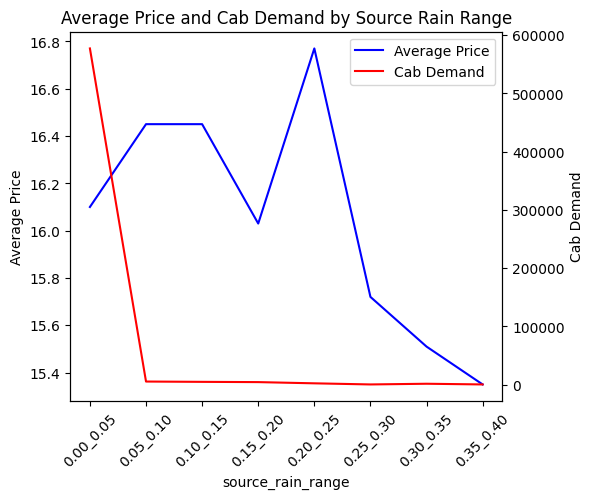

In [ ]:
# convert spark dataframe to pandas dataframe
pandas_df = result_df.toPandas()

# create figure and axis objects
fig, ax1 = plt.subplots()

# plot first line on first y-axis
ax1.set_xlabel("source_rain_range")
ax1.set_ylabel("Average Price")
ax1.plot(pandas_df['source_rain_range'], pandas_df['avg_price'], color='blue', label='Average Price')

# create second y-axis
ax2 = ax1.twinx()

# plot second line on second y-axis
ax2.set_ylabel("Cab Demand")
ax2.plot(pandas_df['source_rain_range'], pandas_df['cab_demand'], color='red', label='Cab Demand')

# set title
plt.title("Average Price and Cab Demand by Source Rain Range")

# add legend and adjust spacing between the two y-axes
fig.legend(loc='upper right', bbox_to_anchor=(1, 1), bbox_transform=ax1.transAxes)
fig.subplots_adjust(right=0.8)

# rotate x-axis labels
ax1.tick_params(axis='x', rotation=45)

# show plot
plt.show()


In [ ]:
from pyspark.sql.functions import when

# Define the different ranges for dest_rain
range_1 = (0.0, 0.05)
range_2 = (0.05, 0.1)
range_3 = (0.1, 0.15)
range_4 = (0.15, 0.2)
range_5 = (0.2, 0.25)
range_6 = (0.25, 0.3)
range_7 = (0.3, 0.35)
range_8 = (0.35, 0.4)

# Use the when function to assign a new variable based on the range of dest_rain
data = data.withColumn("dest_rain_range", 
                       when((data["dest_rain"] >= range_1[0]) & (data["dest_rain"] < range_1[1]), "0.00_0.05")
                       .when((data["dest_rain"] >= range_2[0]) & (data["dest_rain"] < range_2[1]), "0.05_0.10")
                       .when((data["dest_rain"] >= range_3[0]) & (data["dest_rain"] < range_3[1]), "0.10_0.15")
                       .when((data["dest_rain"] >= range_4[0]) & (data["dest_rain"] < range_4[1]), "0.15_0.20")
                       .when((data["dest_rain"] >= range_5[0]) & (data["dest_rain"] < range_5[1]), "0.20_0.25")
                       .when((data["dest_rain"] >= range_6[0]) & (data["dest_rain"] < range_6[1]), "0.25_0.30")
                       .when((data["dest_rain"] >= range_7[0]) & (data["dest_rain"] < range_7[1]), "0.30_0.35")
                       .when((data["dest_rain"] >= range_8[0]) & (data["dest_rain"] < range_8[1]), "0.35_0.40")
                       .otherwise("no range")
                      )

# Show the first 10 rows of the new dataset with the source_rain_range variable
data.select("dest_rain", "dest_rain_range").show(10)

+---------+---------------+
|dest_rain|dest_rain_range|
+---------+---------------+
|   0.0148|      0.00_0.05|
|   0.0148|      0.00_0.05|
|   0.0148|      0.00_0.05|
|   0.0148|      0.00_0.05|
|   0.0148|      0.00_0.05|
|   0.0148|      0.00_0.05|
| 0.012971|      0.00_0.05|
|   0.0148|      0.00_0.05|
|   0.0148|      0.00_0.05|
|   0.0148|      0.00_0.05|
+---------+---------------+
only showing top 10 rows



In [ ]:
from pyspark.sql.functions import round, avg, count

result_df = data.groupBy("dest_rain_range") \
                .agg(round(avg("price"), 2).alias("avg_price"), 
                     count("*").alias('cab_demand')) \
                     .orderBy(F.asc("dest_rain_range"))

result_df.show()

+---------------+---------+----------+
|dest_rain_range|avg_price|cab_demand|
+---------------+---------+----------+
|      0.00_0.05|     16.1|    577259|
|      0.05_0.10|     16.5|      5174|
|      0.10_0.15|     16.5|      4591|
|      0.15_0.20|    15.93|      4453|
|      0.20_0.25|    16.52|      2079|
|      0.25_0.30|    15.82|       283|
|      0.30_0.35|    15.68|      1621|
|      0.35_0.40|    15.13|       240|
+---------------+---------+----------+



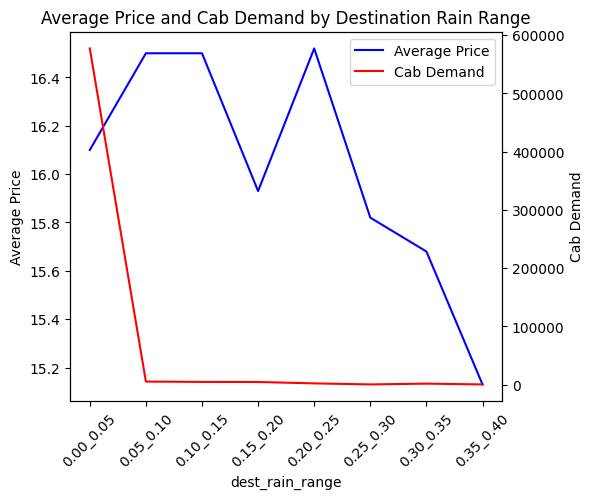

In [ ]:
# convert spark dataframe to pandas dataframe
pandas_df = result_df.toPandas()

# create figure and axis objects
fig, ax1 = plt.subplots()

# plot first line on first y-axis
ax1.set_xlabel("dest_rain_range")
ax1.set_ylabel("Average Price")
ax1.plot(pandas_df['dest_rain_range'], pandas_df['avg_price'], color='blue', label='Average Price')

# create second y-axis
ax2 = ax1.twinx()

# plot second line on second y-axis
ax2.set_ylabel("Cab Demand")
ax2.plot(pandas_df['dest_rain_range'], pandas_df['cab_demand'], color='red', label='Cab Demand')

# set title
plt.title("Average Price and Cab Demand by Destination Rain Range")

# add legend and adjust spacing between the two y-axes
fig.legend(loc='upper right', bbox_to_anchor=(1, 1), bbox_transform=ax1.transAxes)
fig.subplots_adjust(right=0.8)

# rotate x-axis labels
ax1.tick_params(axis='x', rotation=45)

# show plot
plt.show()


By looking at the trend line of percipitation of both the source and destination locations, we could get two insights here: <br>

1. The cab demand drops significantly when percipitaion from 0 to 0.1, then remmain roughly stable afterward. <br>

2. The average price of cabs reaches to peak when percipation is from 0.20 to 0.25 on both the source and destination locations, and both average prices drop after.